In [1]:
import numpy as np
import random
import numpy.linalg as lia
import pandas as pd
import h5py
import random
import math
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn import datasets
from sklearn.cluster import KMeans

#to plot images
import matplotlib.image as mpimg 
#to read images

import cv2 
#open CV library for Python
import numpy as np
import torch
import torchvision
from torchvision.ops import nms
import torchvision.transforms as transforms
from statistics import stdev

In [15]:
!pip install opencv-python==4.4.0.44
!pip install opencv-contrib-python==4.4.0.44
!pip list

Package                            Version
---------------------------------- -------------------
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.9.12
anaconda-project                   0.8.3
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.2
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              20.3.0
Babel                              2.8.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.1
backports.os                       0.1.1
backports.shutil-get-terminal-size 1.0.0
backports.tempfile                 1.0
backports.weakref                  1.0.post1
beautifulsoup4                     4.9.3
bitarray                           1.6.1
bkcharts                           0.2
bleach                             3.2.1

In [2]:
def loadBGRImage(path):
    image = BGR(cv.imread(path))
    return image

def loadGreyImage(path):
    image = cv.imread(path, cv.IMREAD_GRAYSCALE)
    return image

def BGR(image):
    image = cv.cvtColor(image, cv.COLOR_RGB2BGR)
    return image

def displayGreyImage(image, imageName):
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()

def displayGreyWindows(image, imageName):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap = 'gray')
    plt.title(imageName)
    plt.show()
    
def displayBGRImage(image, imageName, size):
    plt.figure(figsize=(size, size))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def displayBGRImageLarge(image, imageName):
    plt.figure(figsize=(18, 18))
    plt.imshow(image)
    plt.title(imageName)
    plt.show()
    
def imageSideBySide(images, imageNames,size):
    row = np.ceil(len(images)/20)
    fig=plt.figure(figsize=(size, size/2))
    for i, image in enumerate(images):
        fig.add_subplot(row, 20, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(imageNames[i])
    plt.show()

In [3]:
start = 25, 26
size = 14, 12

f = h5py.File('MNIST_synthetic.h5', 'r')

list(f.keys())

['test_dataset', 'train_dataset', 'train_labels']

In [4]:
train_dataset = np.squeeze(np.array(f["train_dataset"])).copy()
train_labels = np.squeeze(np.array(f["train_labels"])).copy()
test_dataset = np.squeeze(np.array(f["test_dataset"])).copy()

singulars_digits = []
singulars_labels = []

doubles_digits = []
doubles_labels = []

triples_digits = []
triples_labels = []

quadruples_digits = []
quadruples_labels = []

quintuples_digits = []
quintuples_labels = []


for i, labels in enumerate(train_labels):
    if labels[1] == 10:
        singulars_digits.append(train_dataset[i])
        singulars_labels.append(train_labels[i])
        
    if labels[1] != 10 and labels[2] == 10:
        doubles_digits.append(train_dataset[i])
        doubles_labels.append(train_labels[i])
        
    if labels[2] != 10 and labels[3] == 10:
        triples_digits.append(train_dataset[i])
        triples_labels.append(train_labels[i])
        
    if labels[3] != 10 and labels[4] == 10:
        quadruples_digits.append(train_dataset[i])
        quadruples_labels.append(train_labels[i])
        
    if labels[4] != 10:
        quintuples_digits.append(train_dataset[i])
        quintuples_labels.append(train_labels[i])

In [5]:
singulars_digits = np.array(singulars_digits)     
doubles_digits = np.array(doubles_digits)  
triples_digits = np.array(triples_digits)    
quadruples_digits = np.array(quadruples_digits)    
quintuples_digits = np.array(quintuples_digits)    

singulars_labels = np.array(singulars_labels).T[0]
doubles_labels = np.array(doubles_labels).T[0:2].T
triples_label = np.array(triples_labels).T[0:3].T
quadruples_label = np.array(quadruples_labels).T[0:4].T
quintuples_label = np.array(quintuples_labels).T[0:5].T

In [6]:
final_singulars_dataset = []
final_singulars_labels = list(singulars_labels)
for i, digit in enumerate(singulars_digits):
    final_singulars_dataset.append(digit[26:38,26:38])
    
final_doubles_dataset = []
final_doubles_labels = []
for i, digit in enumerate(doubles_digits):
    final_doubles_dataset.append(digit[26:38,20:32])
    final_doubles_dataset.append(digit[26:38,32:44])
    final_doubles_labels.append(doubles_labels[i][0])
    final_doubles_labels.append(doubles_labels[i][1])

final_triples_dataset = []
final_triples_labels = []
for i, digit in enumerate(triples_digits):
    final_triples_dataset.append(digit[26:38,14:26])
    final_triples_dataset.append(digit[26:38,26:38])
    final_triples_dataset.append(digit[26:38,38:50])
    final_triples_labels.append(triples_labels[i][0])
    final_triples_labels.append(triples_labels[i][1])
    final_triples_labels.append(triples_labels[i][2])
    
final_quadruples_dataset = []
final_quadruples_labels = []
for i, digit in enumerate(quadruples_digits):
    final_quadruples_dataset.append(digit[26:38,8:20])
    final_quadruples_dataset.append(digit[26:38,20:32])
    final_quadruples_dataset.append(digit[26:38,32:44])
    final_quadruples_dataset.append(digit[26:38,44:56])
    final_quadruples_labels.append(quadruples_labels[i][0])
    final_quadruples_labels.append(quadruples_labels[i][1])    
    final_quadruples_labels.append(quadruples_labels[i][2])
    final_quadruples_labels.append(quadruples_labels[i][3]) 
    
final_quintuples_dataset = []
final_quintuples_labels = []
for i, digit in enumerate(quintuples_digits):
    final_quintuples_dataset.append(digit[26:38,2:14])
    final_quintuples_dataset.append(digit[26:38,14:26])
    final_quintuples_dataset.append(digit[26:38,26:38])
    final_quintuples_dataset.append(digit[26:38,38:50])
    final_quintuples_dataset.append(digit[26:38,50:62])
    final_quintuples_labels.append(quintuples_labels[i][0])
    final_quintuples_labels.append(quintuples_labels[i][1])
    final_quintuples_labels.append(quintuples_labels[i][2])
    final_quintuples_labels.append(quintuples_labels[i][3])
    final_quintuples_labels.append(quintuples_labels[i][4])

In [7]:
merged_dataset = final_singulars_dataset + final_doubles_dataset + final_triples_dataset + final_quadruples_dataset + final_quintuples_dataset
merged_labels = final_singulars_labels + final_doubles_labels + final_triples_labels + final_quadruples_labels + final_quintuples_labels

In [8]:
count = 0

for digit in range(10):
    digit_count = list(merged_labels).count(digit)
    print(f"number of {digit}'s in train dataset: {digit_count}")
    count += digit_count

print("total number of digits in train dataset:", count)

number of 0's in train dataset: 16379
number of 1's in train dataset: 18819
number of 2's in train dataset: 17095
number of 3's in train dataset: 17220
number of 4's in train dataset: 16393
number of 5's in train dataset: 15275
number of 6's in train dataset: 16401
number of 7's in train dataset: 17611
number of 8's in train dataset: 16175
number of 9's in train dataset: 16518
total number of digits in train dataset: 167886


In [9]:
digitsTrainingSetSize = int(np.ceil(0.8 * len(merged_dataset)))
digitsValidationSetSize = int(len(merged_labels) - digitsTrainingSetSize)

xValidationSet = []
yValidationSet = []

for index, digit in enumerate(merged_dataset[0:digitsValidationSetSize]):
    xValidationSet.append(digit)
    yValidationSet.append(merged_labels[index])

xTrainingSet = []
yTrainingSet = []

start = len(xValidationSet)

for i, digit in enumerate(merged_dataset[start:]):
    xTrainingSet.append(digit)
    yTrainingSet.append(merged_labels[i+start])

## Finding all digits in an image

In [10]:
def find_digits(train_dataset, size):
    thresh_train_dataset = train_dataset.copy()
    thresh_train_dataset[thresh_train_dataset>30] = 255
    thresh_train_dataset[thresh_train_dataset!=255] = 0
    #displayGreyImage(thresh_train_dataset,"")
    i,j = np.where(thresh_train_dataset[:,:]!=0)
    #print(i)
    bottom_bound = np.min(i)
    top_bound = np.max(i)
    left_bound = np.min(j)
    right_bound = np.max(j)
    #print(top_bound, bottom_bound)

    h = top_bound-bottom_bound
    w = right_bound-left_bound

    bounded_train_dataset = train_dataset[bottom_bound-1:top_bound+2,left_bound-1:right_bound+2]
    thresh = bounded_train_dataset.copy()
    thresh[thresh>30] = 255
    thresh[thresh!=255] = 0
    #displayGreyImage(bounded_train_dataset,"")

    #ret, thresh = cv2.threshold(bounded_train_dataset, 30, 255, 0)
    #seg = np.where(np.any(thresh, axis=0)==0)
    seg = np.where(np.any(thresh, axis=0)==0)

    #print(seg)
    seg_list = np.asarray(seg)
    seg_list = seg_list[0]
    #print(seg_list)

    from statistics import stdev
    sd =0 # remove this and its return when done
    if len(seg_list)>2:
        # create a list of the gaps between the consecutive values
        gaps = [y - x for x, y in zip(seg_list[:-1], seg_list[1:])]
        # have python calculate the standard deviation for the gaps
        sd = stdev(gaps)
        #print(sd)

        # create a list of lists, put the first value of the source data in the first
        lists = [[seg_list[0]]]
        for x in seg_list[1:]:
            # if the gap from the current item to the previous is more than 1 SD
            # Note: the previous item is the last item in the last list
            # Note: the '> 1' is the part you'd modify to make it stricter or more relaxed
            if sd<1.5 and sd>0:
                if (x - lists[-1][-1]) / (sd+1e-18) > 1.5:
                    # then start a new list
                    lists.append([])
              # add the current item to the last list in the list
                lists[-1].append(x)
            elif sd==0:
                if (x - lists[-1][-1])>1:
                    lists.append([])
                lists[-1].append(x)
            else:
                if (x - lists[-1][-1]) / (sd+1e-18) > 0.8:
                  # then start a new list
                  lists.append([])
                # add the current item to the last list in the list
                lists[-1].append(x)

        splits = np.asarray([np.ceil(np.mean(lists[i])) for i in range(len(lists))]).astype(int)

    else:
        splits = np.asarray(seg_list)
      #print(splits)

    n_digits = len(splits)-1
    #digits = np.zeros(n_digits, )
    digits = []
    for i in range(n_digits):
        temp = bounded_train_dataset[:,splits[i]:splits[i+1]]
        # if temp is less than recommeded size first pad on left and then on both sides
        temp_padded = temp.copy()
        if (temp.shape[0] != size) or  (temp.shape[1] != size):
            diff_y = size-temp.shape[0]
            split_diff_y = diff_y//2
            remainder_diff_y = diff_y%2
            diff_x = size-temp.shape[1]
            split_diff_x = diff_x//2
            remainder_diff_x = diff_x%2
            #print(diff_y)
            #print(split_diff_y)
            temp_padded = np.pad(temp, ((split_diff_y+remainder_diff_y,split_diff_y),(split_diff_x+remainder_diff_x,split_diff_x)))

        digits.append(temp_padded)
      #displayGreyImage(train_dataset[bottom_bound-1:top_bound+2,left_bound-1:right_bound+2],train_labels[367])
    return digits, n_digits

In [18]:
def create_boxes_hacks(image, dig_centers):
    
    n_dig = len(dig_centers)
    digits = []
    if n_dig == 1:
        digits.append(image[26:38,26:38])
    elif n_dig == 2:
        digits.append(image[26:38,20:32])
        digits.append(image[26:38,32:44])
    elif n_dig == 3:
        digits.append(image[26:38,14:26])
        digits.append(image[26:38,26:38])
        digits.append(image[26:38,38:50])
    elif n_dig == 4:
        digits.append(image[26:38,8:20])
        digits.append(image[26:38,20:32])
        digits.append(image[26:38,32:44])
        digits.append(image[26:38,44:56])
    elif n_dig == 5:
        digits.append(image[26:38,2:14])
        digits.append(image[26:38,14:26])
        digits.append(image[26:38,26:38])
        digits.append(image[26:38,38:50])
        digits.append(image[26:38,50:62])

    return digits

In [40]:
import random as rng
rng.seed(12345)
def thresh_callback(src, val=30):
    threshold = val

    src_gray = cv2.blur(src, (1,1))

    #src_gray = bounding_box(src_gray,30)

    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    

    arr_centers = np.asarray(centers)
    arr_radius  = np.asarray(radius)

    centers_inds = np.argsort(arr_centers[:,0])
    sorted_centers = arr_centers[centers_inds[::]]
    sorted_radius = arr_radius[centers_inds[::]]
    """
    print("before:", arr_centers)
    print(arr_radius)
    print("after:", sorted_centers)
    print(sorted_radius)
    """

    new_centers = [sorted_centers[i] for i in range(len(sorted_centers)) if sorted_radius[i]>1 and sorted_radius[i]<7]
    new_radius  = [sorted_radius[i] for i in range(len(sorted_radius)) if sorted_radius[i]>1 and sorted_radius[i]<7] 
    
    """
    for i, x in enumerate(new_centers):
      print("new centers", x,"new radius", new_radius[i])
    """

    """
    print(boundRect)
    """

    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)

    """
    for i in range(len(centers)):
      color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
      cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    """
    
    for i in range(len(new_centers)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.circle(drawing, (int(new_centers[i][0]), int(new_centers[i][1])), int(new_radius[i]), color, 2)
    
    """
    displayGreyImage(drawing, "contours")
    """
    
    boxes = []
    scores = []
    boxes_tensor = torch.empty(size=(len(new_centers), 4))
    scores_tensor = torch.empty(len(new_centers))
    for i, x in enumerate(new_centers):
        #print(int(x[0]-new_radius[i]))
        bottom = np.floor(x[1]-new_radius[i]).astype(int)
        top = np.ceil(x[1]+new_radius[i]).astype(int)
        left = np.floor(x[0]-new_radius[i]).astype(int)
        right = np.ceil(x[0]+new_radius[i]).astype(int)
        
        """
        print(f'bottom: {bottom} top: {top} left: {left} right: {right}')
        """

        box = src_gray[bottom:top, left:right]
        score = box.sum()
        scores.append(score)

        #displayGreyImage(box, i)
        boxes.append(box)
        """
        displayGreyImage(boxes[i], i)
        """
        #box_tensor = torch.tensor([bottom, left, top, right])
        #boxes_tensor = torch.cat([box_tensor],0)
        boxes_tensor[i] = torch.tensor([left, bottom, right, top])
        scores_tensor[i] = torch.tensor([score], dtype=torch.float32)

    
    """
    print(f"boxes:{boxes_tensor} scores: {scores_tensor}")
    """

    
    max_boxes_ind = nms(boxes = boxes_tensor, scores = scores_tensor, iou_threshold=0.1)
    
    """
    print(max_boxes_ind)
    """
    
    #cv2_imshow(drawing)
    
    j_list = np.asarray(new_centers)
    """
    print(j_list[:,0])
    """
    j_list = np.asarray(j_list[:,0])
    j_list = np.sort(j_list)
    """
    print("jlist", j_list)
    #print(j_list[1]-j_list[0])
    """

    # create a list of the diffirence in centers between consecutive values
    gaps = [y - x for x, y in zip(j_list[:-1], j_list[1:])]
    """
    print(gaps)
    """
    
    # have python calculate the standard deviation for the gaps
    #sd = stdev(gaps)
    """
    print(sd)
    """
    # create a list of lists, put the first value of the source data in the first
    lists = [[j_list[0]]]
    """
    print(lists)
    """
    radius_lists = [[new_radius[0]]]
    mean_radius = np.median(new_radius)
    #print(mean_radius)
    for i, x in enumerate(j_list[1:]):
        """
        print(x- lists[-1][-1])
        print(new_radius[i])
        
        print(new_radius[i+1])
        print(x-new_radius[i] - (lists[-1][-1]+new_radius[i-1]))
        """
        # if the gap from the current item to the previous is more than 1 SD
        # Note: the previous item is the last item in the last list
        # Note: the '> 1' is the part you'd modify to make it stricter or more relaxed
        if np.abs(x - (lists[-1][-1])) > 6: #radius[i] (new_radius[i]+new_radius[i+1])*2/3
            lists.append([])
            radius_lists.append([])
        lists[-1].append(x)
        radius_lists[-1].append(new_radius[i])
    """
    print(lists)
    print(radius_lists)
    """
    digit_centers = np.asarray([np.mean(lists[i]) for i in range(len(lists))]).astype(int)
    digit_radius = np.asarray([np.max(radius_lists[i]) for i in range(len(radius_lists))]).astype(int)

    final_boxes = create_boxes_hacks(src, digit_centers)

    """
    for i in range(len(final_boxes)):
        displayGreyImage(final_boxes[i],"")
    """
    
    n_digits = len(final_boxes)

    """
    print(digit_centers, digit_radius)
    print(digit_centers)
    print(len(digit_centers))
    """
    return final_boxes, n_digits

In [41]:
wrong = 0 
wrong_arr = []
wrong_arr_index = []
correct = []

for i, sample in enumerate(train_dataset):
    snips, n_dig = thresh_callback(sample)
    real_num_digits = 5 - list(train_labels[i]).count(10)

    if(n_dig != real_num_digits):
        print("incorrect at index:", i)
        wrong += 1
        wrong_arr.append(snips)
        wrong_arr_index.append(i)  

print("total percentage incorrect:", wrong / len(train_dataset) * 100, "%")

incorrect at index: 2903
incorrect at index: 4555
incorrect at index: 7230
incorrect at index: 12016
incorrect at index: 12127
incorrect at index: 16017
incorrect at index: 18127
incorrect at index: 19418
incorrect at index: 19580
incorrect at index: 19752
incorrect at index: 20317
incorrect at index: 24262
incorrect at index: 25284
incorrect at index: 28261
incorrect at index: 32014
incorrect at index: 32944
incorrect at index: 32954
incorrect at index: 38206
incorrect at index: 48432
incorrect at index: 50390
incorrect at index: 51039
total percentage incorrect: 0.0375 %


In [42]:
num_test_digits = 0

for i, sample in enumerate(test_dataset):
    images, n_digits = thresh_callback(sample)
   
    num_test_digits += n_digits

divs = []

for div in range(1, 100):
    if(num_test_digits % (div) == 0):
        divs.append(div)

batch_size = divs[-1]
print(batch_size)

17


# CNN

In [43]:
def create_batches(input_array, label_array, batch_size):
    batched = []
    label_batched = []
    
    for i in range(np.floor(len(input_array)/batch_size).astype(int)):
        batched.append(np.expand_dims((np.array(input_array[i*batch_size:i*batch_size+batch_size])).astype(np.single),axis=1))
        label_batched.append(label_array[i*batch_size:i*batch_size+batch_size])
        
    return np.array(batched), label_batched

In [44]:
class Net(nn.Module):
    def __init__(self, h_layers):
        self.num_layers = len(h_layers)
        self.h_layers = h_layers      
        self.convs = []
        
        super(Net, self).__init__()
        
        for i, n in enumerate(self.h_layers):
            if i == 0:
                self.convs.append(nn.Conv2d(1, n, 3))
            else:
                self.convs.append(nn.Conv2d(self.h_layers[i-1], n, 3))

        self.fc1 = nn.Linear(self.h_layers[-1]**2 , 10)

    def forward(self, x):
        for i in range(len(self.h_layers)):
            x = F.relu(self.convs[i](x))
            
        x = x.view(-1, self.h_layers[-1]**2)
        x = self.fc1(x)
        return x

# Train CNN for hyper-parameter testing

In [46]:
training_dataset_batch, training_labels_batch = create_batches(xTrainingSet, yTrainingSet, batch_size)
validation_dataset_batch, validation_labels_batch = create_batches(xValidationSet, yValidationSet, batch_size)

# model hyper-parameters
h_layers = ([batch_size, 64])
max_iters = 10
learning_rate = 0.01
momentum = 0.9

# train neural network
net = Net(h_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(max_iters):
    running_loss = 0.0
    
    for i, data in enumerate(training_dataset_batch):
        inputs = torch.from_numpy(data)
        labels = training_labels_batch[i] 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

# test validation set on model
correct = 0
total = 0

with torch.no_grad():
    for i, data in enumerate(validation_dataset_batch):
        images = torch.from_numpy(data)
        labels = validation_labels_batch[i]
        labels = torch.from_numpy(np.array(labels).astype(np.longlong))
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        if (int(predicted[0]) != int(labels[0])):
            None

print(f"validation set accuracy ({total} samples): {(100 * correct / total)}")

[1,    20] loss: 5409.737
[1,    40] loss: 2441.096
[1,    60] loss: 1569.238
[1,    80] loss: 1204.902
[1,   100] loss: 980.197
[1,   120] loss: 913.759
[1,   140] loss: 1084.226
[1,   160] loss: 1174.430
[1,   180] loss: 1865.460
[1,   200] loss: 976.533
[1,   220] loss: 549.480
[1,   240] loss: 850.341
[1,   260] loss: 817.563
[1,   280] loss: 633.018
[1,   300] loss: 1083.767
[1,   320] loss: 1134.638
[1,   340] loss: 1204.567
[1,   360] loss: 873.696
[1,   380] loss: 885.256
[1,   400] loss: 580.189
[1,   420] loss: 705.653
[1,   440] loss: 645.743
[1,   460] loss: 924.236
[1,   480] loss: 854.488
[1,   500] loss: 1248.103
[1,   520] loss: 888.260
[1,   540] loss: 1346.909
[1,   560] loss: 920.108
[1,   580] loss: 1310.805
[1,   600] loss: 708.944
[1,   620] loss: 1132.310
[1,   640] loss: 690.084
[1,   660] loss: 944.465
[1,   680] loss: 781.057
[1,   700] loss: 769.259
[1,   720] loss: 623.746
[1,   740] loss: 479.073
[1,   760] loss: 623.834
[1,   780] loss: 512.230
[1,   800] 

[1,  6620] loss: 312.516
[1,  6640] loss: 337.532
[1,  6660] loss: 225.382
[1,  6680] loss: 215.313
[1,  6700] loss: 364.900
[1,  6720] loss: 305.108
[1,  6740] loss: 272.336
[1,  6760] loss: 270.593
[1,  6780] loss: 158.717
[1,  6800] loss: 142.786
[1,  6820] loss: 189.155
[1,  6840] loss: 338.320
[1,  6860] loss: 307.675
[1,  6880] loss: 223.800
[1,  6900] loss: 329.435
[1,  6920] loss: 283.627
[1,  6940] loss: 396.198
[1,  6960] loss: 213.279
[1,  6980] loss: 187.545
[1,  7000] loss: 213.692
[1,  7020] loss: 195.466
[1,  7040] loss: 124.240
[1,  7060] loss: 327.566
[1,  7080] loss: 211.190
[1,  7100] loss: 186.300
[1,  7120] loss: 373.818
[1,  7140] loss: 326.075
[1,  7160] loss: 335.821
[1,  7180] loss: 127.571
[1,  7200] loss: 393.051
[1,  7220] loss: 306.018
[1,  7240] loss: 379.786
[1,  7260] loss: 150.808
[1,  7280] loss: 232.541
[1,  7300] loss: 241.801
[1,  7320] loss: 220.013
[1,  7340] loss: 301.026
[1,  7360] loss: 270.802
[1,  7380] loss: 163.320
[1,  7400] loss: 250.620


[2,  5300] loss: 134.155
[2,  5320] loss: 222.055
[2,  5340] loss: 149.721
[2,  5360] loss: 241.929
[2,  5380] loss: 251.855
[2,  5400] loss: 223.512
[2,  5420] loss: 355.942
[2,  5440] loss: 481.517
[2,  5460] loss: 383.954
[2,  5480] loss: 315.852
[2,  5500] loss: 116.252
[2,  5520] loss: 93.776
[2,  5540] loss: 222.317
[2,  5560] loss: 162.637
[2,  5580] loss: 296.768
[2,  5600] loss: 300.196
[2,  5620] loss: 374.779
[2,  5640] loss: 161.767
[2,  5660] loss: 113.512
[2,  5680] loss: 73.226
[2,  5700] loss: 114.595
[2,  5720] loss: 94.632
[2,  5740] loss: 175.521
[2,  5760] loss: 173.703
[2,  5780] loss: 276.393
[2,  5800] loss: 99.788
[2,  5820] loss: 101.393
[2,  5840] loss: 129.978
[2,  5860] loss: 180.754
[2,  5880] loss: 181.077
[2,  5900] loss: 169.677
[2,  5920] loss: 230.059
[2,  5940] loss: 315.841
[2,  5960] loss: 162.857
[2,  5980] loss: 189.631
[2,  6000] loss: 339.570
[2,  6020] loss: 207.045
[2,  6040] loss: 165.586
[2,  6060] loss: 169.568
[2,  6080] loss: 106.923
[2, 

[3,  4040] loss: 121.719
[3,  4060] loss: 160.332
[3,  4080] loss: 176.989
[3,  4100] loss: 219.101
[3,  4120] loss: 274.895
[3,  4140] loss: 107.746
[3,  4160] loss: 137.231
[3,  4180] loss: 85.200
[3,  4200] loss: 160.730
[3,  4220] loss: 201.728
[3,  4240] loss: 131.704
[3,  4260] loss: 119.732
[3,  4280] loss: 151.830
[3,  4300] loss: 147.476
[3,  4320] loss: 184.340
[3,  4340] loss: 86.235
[3,  4360] loss: 157.808
[3,  4380] loss: 165.528
[3,  4400] loss: 297.991
[3,  4420] loss: 124.448
[3,  4440] loss: 213.262
[3,  4460] loss: 113.720
[3,  4480] loss: 306.399
[3,  4500] loss: 164.892
[3,  4520] loss: 239.601
[3,  4540] loss: 160.120
[3,  4560] loss: 109.818
[3,  4580] loss: 55.628
[3,  4600] loss: 155.734
[3,  4620] loss: 203.463
[3,  4640] loss: 140.918
[3,  4660] loss: 110.648
[3,  4680] loss: 109.634
[3,  4700] loss: 94.332
[3,  4720] loss: 363.693
[3,  4740] loss: 176.398
[3,  4760] loss: 226.320
[3,  4780] loss: 161.191
[3,  4800] loss: 177.016
[3,  4820] loss: 61.064
[3,  

[4,  2760] loss: 133.518
[4,  2780] loss: 180.397
[4,  2800] loss: 128.561
[4,  2820] loss: 150.745
[4,  2840] loss: 182.939
[4,  2860] loss: 192.501
[4,  2880] loss: 140.596
[4,  2900] loss: 89.100
[4,  2920] loss: 98.010
[4,  2940] loss: 176.021
[4,  2960] loss: 98.457
[4,  2980] loss: 65.750
[4,  3000] loss: 201.333
[4,  3020] loss: 199.885
[4,  3040] loss: 229.258
[4,  3060] loss: 62.104
[4,  3080] loss: 93.504
[4,  3100] loss: 201.946
[4,  3120] loss: 128.383
[4,  3140] loss: 71.874
[4,  3160] loss: 254.621
[4,  3180] loss: 303.898
[4,  3200] loss: 241.573
[4,  3220] loss: 344.505
[4,  3240] loss: 123.311
[4,  3260] loss: 142.097
[4,  3280] loss: 63.938
[4,  3300] loss: 390.135
[4,  3320] loss: 46.593
[4,  3340] loss: 78.418
[4,  3360] loss: 249.450
[4,  3380] loss: 150.088
[4,  3400] loss: 216.529
[4,  3420] loss: 90.531
[4,  3440] loss: 183.844
[4,  3460] loss: 124.019
[4,  3480] loss: 151.211
[4,  3500] loss: 122.904
[4,  3520] loss: 208.222
[4,  3540] loss: 168.541
[4,  3560] 

[5,  1540] loss: 114.637
[5,  1560] loss: 63.867
[5,  1580] loss: 227.205
[5,  1600] loss: 132.376
[5,  1620] loss: 146.933
[5,  1640] loss: 60.945
[5,  1660] loss: 124.480
[5,  1680] loss: 119.983
[5,  1700] loss: 94.471
[5,  1720] loss: 13.358
[5,  1740] loss: 51.698
[5,  1760] loss: 153.670
[5,  1780] loss: 61.672
[5,  1800] loss: 97.080
[5,  1820] loss: 125.431
[5,  1840] loss: 89.877
[5,  1860] loss: 232.527
[5,  1880] loss: 97.019
[5,  1900] loss: 58.560
[5,  1920] loss: 156.972
[5,  1940] loss: 189.482
[5,  1960] loss: 121.410
[5,  1980] loss: 145.752
[5,  2000] loss: 240.632
[5,  2020] loss: 252.812
[5,  2040] loss: 232.371
[5,  2060] loss: 17.545
[5,  2080] loss: 70.557
[5,  2100] loss: 87.098
[5,  2120] loss: 107.606
[5,  2140] loss: 201.582
[5,  2160] loss: 166.326
[5,  2180] loss: 131.774
[5,  2200] loss: 94.363
[5,  2220] loss: 163.054
[5,  2240] loss: 279.022
[5,  2260] loss: 156.438
[5,  2280] loss: 118.290
[5,  2300] loss: 86.593
[5,  2320] loss: 278.690
[5,  2340] loss

[6,   340] loss: 150.850
[6,   360] loss: 83.849
[6,   380] loss: 171.462
[6,   400] loss: 113.000
[6,   420] loss: 121.684
[6,   440] loss: 72.728
[6,   460] loss: 138.796
[6,   480] loss: 92.573
[6,   500] loss: 53.478
[6,   520] loss: 43.927
[6,   540] loss: 152.611
[6,   560] loss: 116.727
[6,   580] loss: 202.069
[6,   600] loss: 66.073
[6,   620] loss: 165.565
[6,   640] loss: 40.297
[6,   660] loss: 85.459
[6,   680] loss: 97.589
[6,   700] loss: 215.873
[6,   720] loss: 138.465
[6,   740] loss: 90.444
[6,   760] loss: 126.368
[6,   780] loss: 108.870
[6,   800] loss: 62.406
[6,   820] loss: 172.662
[6,   840] loss: 76.116
[6,   860] loss: 23.663
[6,   880] loss: 12.884
[6,   900] loss: 20.365
[6,   920] loss: 110.421
[6,   940] loss: 134.794
[6,   960] loss: 128.350
[6,   980] loss: 78.648
[6,  1000] loss: 82.878
[6,  1020] loss: 101.651
[6,  1040] loss: 276.473
[6,  1060] loss: 47.594
[6,  1080] loss: 75.648
[6,  1100] loss: 98.914
[6,  1120] loss: 54.297
[6,  1140] loss: 128.

[6,  7020] loss: 80.130
[6,  7040] loss: 115.349
[6,  7060] loss: 49.242
[6,  7080] loss: 71.078
[6,  7100] loss: 70.232
[6,  7120] loss: 105.854
[6,  7140] loss: 80.703
[6,  7160] loss: 133.374
[6,  7180] loss: 94.028
[6,  7200] loss: 151.440
[6,  7220] loss: 129.520
[6,  7240] loss: 149.530
[6,  7260] loss: 66.181
[6,  7280] loss: 71.885
[6,  7300] loss: 106.140
[6,  7320] loss: 27.080
[6,  7340] loss: 176.556
[6,  7360] loss: 81.662
[6,  7380] loss: 60.704
[6,  7400] loss: 159.623
[6,  7420] loss: 159.877
[6,  7440] loss: 74.678
[6,  7460] loss: 247.787
[6,  7480] loss: 174.440
[6,  7500] loss: 134.193
[6,  7520] loss: 207.736
[6,  7540] loss: 218.033
[6,  7560] loss: 214.888
[6,  7580] loss: 149.948
[6,  7600] loss: 54.855
[6,  7620] loss: 96.669
[6,  7640] loss: 131.538
[6,  7660] loss: 161.170
[6,  7680] loss: 85.880
[6,  7700] loss: 98.747
[6,  7720] loss: 94.534
[6,  7740] loss: 172.134
[6,  7760] loss: 66.944
[6,  7780] loss: 236.500
[6,  7800] loss: 106.192
[6,  7820] loss: 1

[7,  5820] loss: 35.401
[7,  5840] loss: 97.957
[7,  5860] loss: 155.007
[7,  5880] loss: 192.716
[7,  5900] loss: 95.649
[7,  5920] loss: 107.260
[7,  5940] loss: 80.327
[7,  5960] loss: 47.519
[7,  5980] loss: 104.496
[7,  6000] loss: 128.962
[7,  6020] loss: 54.859
[7,  6040] loss: 36.121
[7,  6060] loss: 70.184
[7,  6080] loss: 72.115
[7,  6100] loss: 50.493
[7,  6120] loss: 102.096
[7,  6140] loss: 102.865
[7,  6160] loss: 36.481
[7,  6180] loss: 47.720
[7,  6200] loss: 81.951
[7,  6220] loss: 86.374
[7,  6240] loss: 160.376
[7,  6260] loss: 107.131
[7,  6280] loss: 104.399
[7,  6300] loss: 180.981
[7,  6320] loss: 59.656
[7,  6340] loss: 129.640
[7,  6360] loss: 123.079
[7,  6380] loss: 136.997
[7,  6400] loss: 121.991
[7,  6420] loss: 43.051
[7,  6440] loss: 87.735
[7,  6460] loss: 130.474
[7,  6480] loss: 94.791
[7,  6500] loss: 87.444
[7,  6520] loss: 50.932
[7,  6540] loss: 178.706
[7,  6560] loss: 124.184
[7,  6580] loss: 99.282
[7,  6600] loss: 121.749
[7,  6620] loss: 93.8

[8,  4640] loss: 37.390
[8,  4660] loss: 53.529
[8,  4680] loss: 30.721
[8,  4700] loss: 39.533
[8,  4720] loss: 179.164
[8,  4740] loss: 126.806
[8,  4760] loss: 149.319
[8,  4780] loss: 71.806
[8,  4800] loss: 61.172
[8,  4820] loss: 92.808
[8,  4840] loss: 111.402
[8,  4860] loss: 46.316
[8,  4880] loss: 72.071
[8,  4900] loss: 73.982
[8,  4920] loss: 116.611
[8,  4940] loss: 84.730
[8,  4960] loss: 123.140
[8,  4980] loss: 137.527
[8,  5000] loss: 137.326
[8,  5020] loss: 66.845
[8,  5040] loss: 68.573
[8,  5060] loss: 63.298
[8,  5080] loss: 135.009
[8,  5100] loss: 80.534
[8,  5120] loss: 116.012
[8,  5140] loss: 41.097
[8,  5160] loss: 78.187
[8,  5180] loss: 173.712
[8,  5200] loss: 32.391
[8,  5220] loss: 50.170
[8,  5240] loss: 108.945
[8,  5260] loss: 100.344
[8,  5280] loss: 86.062
[8,  5300] loss: 131.537
[8,  5320] loss: 97.228
[8,  5340] loss: 86.591
[8,  5360] loss: 101.429
[8,  5380] loss: 72.848
[8,  5400] loss: 108.815
[8,  5420] loss: 104.408
[8,  5440] loss: 87.509

[9,  3480] loss: 27.708
[9,  3500] loss: 126.298
[9,  3520] loss: 161.064
[9,  3540] loss: 73.623
[9,  3560] loss: 70.434
[9,  3580] loss: 88.534
[9,  3600] loss: 64.122
[9,  3620] loss: 115.742
[9,  3640] loss: 57.810
[9,  3660] loss: 37.475
[9,  3680] loss: 27.568
[9,  3700] loss: 84.999
[9,  3720] loss: 38.713
[9,  3740] loss: 122.334
[9,  3760] loss: 32.158
[9,  3780] loss: 38.471
[9,  3800] loss: 117.543
[9,  3820] loss: 91.111
[9,  3840] loss: 63.598
[9,  3860] loss: 108.708
[9,  3880] loss: 44.965
[9,  3900] loss: 62.853
[9,  3920] loss: 146.253
[9,  3940] loss: 25.300
[9,  3960] loss: 52.277
[9,  3980] loss: 125.211
[9,  4000] loss: 48.753
[9,  4020] loss: 76.462
[9,  4040] loss: 84.012
[9,  4060] loss: 126.141
[9,  4080] loss: 23.337
[9,  4100] loss: 55.915
[9,  4120] loss: 98.943
[9,  4140] loss: 26.813
[9,  4160] loss: 78.574
[9,  4180] loss: 79.653
[9,  4200] loss: 96.073
[9,  4220] loss: 121.492
[9,  4240] loss: 66.088
[9,  4260] loss: 79.366
[9,  4280] loss: 106.269
[9,  

[10,  2240] loss: 256.129
[10,  2260] loss: 84.351
[10,  2280] loss: 102.577
[10,  2300] loss: 114.011
[10,  2320] loss: 171.007
[10,  2340] loss: 149.293
[10,  2360] loss: 62.814
[10,  2380] loss: 74.853
[10,  2400] loss: 78.528
[10,  2420] loss: 89.479
[10,  2440] loss: 168.968
[10,  2460] loss: 67.427
[10,  2480] loss: 96.374
[10,  2500] loss: 38.914
[10,  2520] loss: 109.402
[10,  2540] loss: 120.790
[10,  2560] loss: 103.623
[10,  2580] loss: 9.905
[10,  2600] loss: 194.396
[10,  2620] loss: 132.793
[10,  2640] loss: 356.668
[10,  2660] loss: 242.028
[10,  2680] loss: 117.440
[10,  2700] loss: 91.255
[10,  2720] loss: 78.959
[10,  2740] loss: 90.058
[10,  2760] loss: 63.524
[10,  2780] loss: 150.120
[10,  2800] loss: 61.983
[10,  2820] loss: 80.467
[10,  2840] loss: 50.712
[10,  2860] loss: 34.282
[10,  2880] loss: 55.221
[10,  2900] loss: 42.992
[10,  2920] loss: 74.677
[10,  2940] loss: 84.401
[10,  2960] loss: 117.768
[10,  2980] loss: 60.052
[10,  3000] loss: 121.245
[10,  302

# Train CNN to predict unseen dataset

In [47]:
full_dataset = xTrainingSet + xValidationSet
full_labels = yTrainingSet + yValidationSet

full_dataset_batch, full_labels_batch = create_batches(full_dataset, full_labels, batch_size)

net = Net(h_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(max_iters):
    running_loss = 0.0
    
    for i, data in enumerate(full_dataset_batch):
        inputs = torch.from_numpy(data)
        labels = full_labels_batch[i] 
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, torch.from_numpy(np.array(labels).astype(np.longlong)))
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if i % 20 == 19:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

[1,    20] loss: 10924.641
[1,    40] loss: 5575.348
[1,    60] loss: 2346.175
[1,    80] loss: 1662.809
[1,   100] loss: 1355.888
[1,   120] loss: 1366.925
[1,   140] loss: 1271.034
[1,   160] loss: 2043.551
[1,   180] loss: 3132.635
[1,   200] loss: 1307.644
[1,   220] loss: 781.576
[1,   240] loss: 1310.224
[1,   260] loss: 1887.192
[1,   280] loss: 823.132
[1,   300] loss: 1777.656
[1,   320] loss: 2348.485
[1,   340] loss: 1628.402
[1,   360] loss: 905.158
[1,   380] loss: 901.424
[1,   400] loss: 926.498
[1,   420] loss: 1040.580
[1,   440] loss: 930.359
[1,   460] loss: 1885.797
[1,   480] loss: 1608.035
[1,   500] loss: 1816.412
[1,   520] loss: 1772.648
[1,   540] loss: 1493.958
[1,   560] loss: 1584.602
[1,   580] loss: 1606.729
[1,   600] loss: 1488.071
[1,   620] loss: 1973.885
[1,   640] loss: 955.059
[1,   660] loss: 1478.128
[1,   680] loss: 939.513
[1,   700] loss: 1477.996
[1,   720] loss: 934.070
[1,   740] loss: 916.028
[1,   760] loss: 1040.671
[1,   780] loss: 1337

[1,  6540] loss: 461.310
[1,  6560] loss: 572.940
[1,  6580] loss: 491.634
[1,  6600] loss: 521.011
[1,  6620] loss: 483.157
[1,  6640] loss: 684.899
[1,  6660] loss: 437.687
[1,  6680] loss: 407.398
[1,  6700] loss: 672.680
[1,  6720] loss: 324.903
[1,  6740] loss: 371.400
[1,  6760] loss: 347.134
[1,  6780] loss: 227.433
[1,  6800] loss: 271.442
[1,  6820] loss: 612.954
[1,  6840] loss: 620.594
[1,  6860] loss: 442.008
[1,  6880] loss: 331.792
[1,  6900] loss: 430.151
[1,  6920] loss: 318.750
[1,  6940] loss: 609.169
[1,  6960] loss: 494.323
[1,  6980] loss: 277.756
[1,  7000] loss: 454.494
[1,  7020] loss: 328.705
[1,  7040] loss: 453.884
[1,  7060] loss: 293.479
[1,  7080] loss: 425.433
[1,  7100] loss: 303.203
[1,  7120] loss: 314.335
[1,  7140] loss: 375.230
[1,  7160] loss: 476.162
[1,  7180] loss: 310.030
[1,  7200] loss: 557.252
[1,  7220] loss: 503.347
[1,  7240] loss: 623.604
[1,  7260] loss: 226.095
[1,  7280] loss: 488.347
[1,  7300] loss: 310.529
[1,  7320] loss: 447.321


[2,  3240] loss: 341.108
[2,  3260] loss: 388.505
[2,  3280] loss: 191.782
[2,  3300] loss: 709.872
[2,  3320] loss: 175.024
[2,  3340] loss: 247.105
[2,  3360] loss: 751.199
[2,  3380] loss: 397.957
[2,  3400] loss: 546.520
[2,  3420] loss: 373.785
[2,  3440] loss: 510.740
[2,  3460] loss: 320.809
[2,  3480] loss: 388.599
[2,  3500] loss: 544.083
[2,  3520] loss: 689.394
[2,  3540] loss: 440.792
[2,  3560] loss: 340.141
[2,  3580] loss: 358.271
[2,  3600] loss: 284.303
[2,  3620] loss: 283.243
[2,  3640] loss: 131.730
[2,  3660] loss: 255.332
[2,  3680] loss: 95.095
[2,  3700] loss: 220.495
[2,  3720] loss: 381.165
[2,  3740] loss: 199.260
[2,  3760] loss: 194.190
[2,  3780] loss: 264.803
[2,  3800] loss: 295.359
[2,  3820] loss: 231.628
[2,  3840] loss: 152.813
[2,  3860] loss: 442.486
[2,  3880] loss: 320.469
[2,  3900] loss: 403.774
[2,  3920] loss: 688.906
[2,  3940] loss: 185.650
[2,  3960] loss: 232.090
[2,  3980] loss: 402.433
[2,  4000] loss: 165.810
[2,  4020] loss: 207.194
[

[2,  9820] loss: 446.621
[2,  9840] loss: 193.066
[2,  9860] loss: 812.154
[3,    20] loss: 304.044
[3,    40] loss: 146.506
[3,    60] loss: 301.644
[3,    80] loss: 270.072
[3,   100] loss: 328.314
[3,   120] loss: 385.878
[3,   140] loss: 364.691
[3,   160] loss: 223.457
[3,   180] loss: 243.100
[3,   200] loss: 259.593
[3,   220] loss: 55.689
[3,   240] loss: 158.489
[3,   260] loss: 247.725
[3,   280] loss: 318.557
[3,   300] loss: 253.322
[3,   320] loss: 128.689
[3,   340] loss: 350.104
[3,   360] loss: 220.772
[3,   380] loss: 163.881
[3,   400] loss: 227.183
[3,   420] loss: 272.628
[3,   440] loss: 222.437
[3,   460] loss: 347.640
[3,   480] loss: 264.196
[3,   500] loss: 249.092
[3,   520] loss: 165.947
[3,   540] loss: 346.934
[3,   560] loss: 192.346
[3,   580] loss: 407.229
[3,   600] loss: 246.284
[3,   620] loss: 789.424
[3,   640] loss: 466.964
[3,   660] loss: 212.231
[3,   680] loss: 341.221
[3,   700] loss: 597.291
[3,   720] loss: 318.291
[3,   740] loss: 334.816
[

[3,  6520] loss: 349.333
[3,  6540] loss: 120.324
[3,  6560] loss: 180.089
[3,  6580] loss: 322.485
[3,  6600] loss: 94.842
[3,  6620] loss: 271.798
[3,  6640] loss: 469.355
[3,  6660] loss: 207.742
[3,  6680] loss: 325.740
[3,  6700] loss: 492.570
[3,  6720] loss: 200.616
[3,  6740] loss: 265.617
[3,  6760] loss: 225.598
[3,  6780] loss: 197.116
[3,  6800] loss: 186.835
[3,  6820] loss: 204.079
[3,  6840] loss: 325.288
[3,  6860] loss: 336.372
[3,  6880] loss: 236.771
[3,  6900] loss: 312.826
[3,  6920] loss: 218.137
[3,  6940] loss: 241.034
[3,  6960] loss: 282.422
[3,  6980] loss: 119.330
[3,  7000] loss: 211.698
[3,  7020] loss: 215.700
[3,  7040] loss: 227.317
[3,  7060] loss: 387.876
[3,  7080] loss: 22.225
[3,  7100] loss: 121.993
[3,  7120] loss: 296.878
[3,  7140] loss: 119.817
[3,  7160] loss: 322.976
[3,  7180] loss: 228.795
[3,  7200] loss: 477.369
[3,  7220] loss: 290.751
[3,  7240] loss: 353.644
[3,  7260] loss: 79.741
[3,  7280] loss: 173.523
[3,  7300] loss: 254.639
[3,

[4,  3260] loss: 273.435
[4,  3280] loss: 134.296
[4,  3300] loss: 314.426
[4,  3320] loss: 82.902
[4,  3340] loss: 80.089
[4,  3360] loss: 306.242
[4,  3380] loss: 159.515
[4,  3400] loss: 234.924
[4,  3420] loss: 123.464
[4,  3440] loss: 274.272
[4,  3460] loss: 164.131
[4,  3480] loss: 240.887
[4,  3500] loss: 238.331
[4,  3520] loss: 343.000
[4,  3540] loss: 332.338
[4,  3560] loss: 413.510
[4,  3580] loss: 208.759
[4,  3600] loss: 163.493
[4,  3620] loss: 211.120
[4,  3640] loss: 115.608
[4,  3660] loss: 185.542
[4,  3680] loss: 148.498
[4,  3700] loss: 203.013
[4,  3720] loss: 157.802
[4,  3740] loss: 93.275
[4,  3760] loss: 256.364
[4,  3780] loss: 72.311
[4,  3800] loss: 299.129
[4,  3820] loss: 166.926
[4,  3840] loss: 206.379
[4,  3860] loss: 221.921
[4,  3880] loss: 160.127
[4,  3900] loss: 66.927
[4,  3920] loss: 260.728
[4,  3940] loss: 51.757
[4,  3960] loss: 45.557
[4,  3980] loss: 179.459
[4,  4000] loss: 205.956
[4,  4020] loss: 138.201
[4,  4040] loss: 146.595
[4,  40

[4,  9840] loss: 66.602
[4,  9860] loss: 667.108
[5,    20] loss: 139.680
[5,    40] loss: 184.273
[5,    60] loss: 134.010
[5,    80] loss: 129.503
[5,   100] loss: 230.102
[5,   120] loss: 315.912
[5,   140] loss: 175.484
[5,   160] loss: 223.567
[5,   180] loss: 227.937
[5,   200] loss: 103.304
[5,   220] loss: 84.435
[5,   240] loss: 42.274
[5,   260] loss: 460.493
[5,   280] loss: 225.372
[5,   300] loss: 110.085
[5,   320] loss: 66.410
[5,   340] loss: 230.392
[5,   360] loss: 275.161
[5,   380] loss: 202.952
[5,   400] loss: 229.936
[5,   420] loss: 149.179
[5,   440] loss: 118.299
[5,   460] loss: 239.303
[5,   480] loss: 213.481
[5,   500] loss: 145.166
[5,   520] loss: 145.614
[5,   540] loss: 273.109
[5,   560] loss: 275.783
[5,   580] loss: 153.311
[5,   600] loss: 55.473
[5,   620] loss: 341.888
[5,   640] loss: 83.102
[5,   660] loss: 129.442
[5,   680] loss: 199.759
[5,   700] loss: 479.460
[5,   720] loss: 180.731
[5,   740] loss: 139.592
[5,   760] loss: 206.371
[5,   

[5,  6620] loss: 269.002
[5,  6640] loss: 389.826
[5,  6660] loss: 75.888
[5,  6680] loss: 363.501
[5,  6700] loss: 229.525
[5,  6720] loss: 110.314
[5,  6740] loss: 139.718
[5,  6760] loss: 147.112
[5,  6780] loss: 150.546
[5,  6800] loss: 104.082
[5,  6820] loss: 253.685
[5,  6840] loss: 413.377
[5,  6860] loss: 255.673
[5,  6880] loss: 162.526
[5,  6900] loss: 103.664
[5,  6920] loss: 101.395
[5,  6940] loss: 105.642
[5,  6960] loss: 120.625
[5,  6980] loss: 112.333
[5,  7000] loss: 141.161
[5,  7020] loss: 213.080
[5,  7040] loss: 292.227
[5,  7060] loss: 18.929
[5,  7080] loss: 128.508
[5,  7100] loss: 99.011
[5,  7120] loss: 233.086
[5,  7140] loss: 81.801
[5,  7160] loss: 248.422
[5,  7180] loss: 113.722
[5,  7200] loss: 275.758
[5,  7220] loss: 229.729
[5,  7240] loss: 225.424
[5,  7260] loss: 65.346
[5,  7280] loss: 257.376
[5,  7300] loss: 67.875
[5,  7320] loss: 86.454
[5,  7340] loss: 141.263
[5,  7360] loss: 28.352
[5,  7380] loss: 58.341
[5,  7400] loss: 361.105
[5,  7420

[6,  3400] loss: 266.526
[6,  3420] loss: 141.190
[6,  3440] loss: 372.993
[6,  3460] loss: 121.575
[6,  3480] loss: 184.392
[6,  3500] loss: 193.664
[6,  3520] loss: 353.038
[6,  3540] loss: 122.584
[6,  3560] loss: 120.163
[6,  3580] loss: 211.859
[6,  3600] loss: 245.345
[6,  3620] loss: 96.123
[6,  3640] loss: 154.506
[6,  3660] loss: 343.461
[6,  3680] loss: 143.903
[6,  3700] loss: 148.816
[6,  3720] loss: 160.049
[6,  3740] loss: 200.134
[6,  3760] loss: 240.468
[6,  3780] loss: 141.232
[6,  3800] loss: 242.659
[6,  3820] loss: 152.988
[6,  3840] loss: 209.133
[6,  3860] loss: 164.777
[6,  3880] loss: 63.470
[6,  3900] loss: 136.745
[6,  3920] loss: 405.536
[6,  3940] loss: 214.109
[6,  3960] loss: 75.985
[6,  3980] loss: 255.020
[6,  4000] loss: 213.167
[6,  4020] loss: 141.061
[6,  4040] loss: 115.494
[6,  4060] loss: 168.938
[6,  4080] loss: 161.047
[6,  4100] loss: 319.670
[6,  4120] loss: 116.075
[6,  4140] loss: 158.980
[6,  4160] loss: 82.102
[6,  4180] loss: 67.122
[6,  

[7,   200] loss: 119.067
[7,   220] loss: 89.981
[7,   240] loss: 107.781
[7,   260] loss: 157.006
[7,   280] loss: 151.130
[7,   300] loss: 110.658
[7,   320] loss: 51.446
[7,   340] loss: 229.884
[7,   360] loss: 124.255
[7,   380] loss: 193.779
[7,   400] loss: 113.537
[7,   420] loss: 142.147
[7,   440] loss: 124.200
[7,   460] loss: 195.820
[7,   480] loss: 152.898
[7,   500] loss: 111.888
[7,   520] loss: 164.457
[7,   540] loss: 116.917
[7,   560] loss: 148.178
[7,   580] loss: 145.061
[7,   600] loss: 42.055
[7,   620] loss: 383.966
[7,   640] loss: 34.243
[7,   660] loss: 140.832
[7,   680] loss: 223.007
[7,   700] loss: 309.872
[7,   720] loss: 140.343
[7,   740] loss: 194.022
[7,   760] loss: 180.703
[7,   780] loss: 194.765
[7,   800] loss: 134.039
[7,   820] loss: 198.086
[7,   840] loss: 168.480
[7,   860] loss: 46.358
[7,   880] loss: 104.356
[7,   900] loss: 171.605
[7,   920] loss: 190.889
[7,   940] loss: 176.090
[7,   960] loss: 175.935
[7,   980] loss: 121.971
[7,  

[7,  6840] loss: 289.746
[7,  6860] loss: 200.022
[7,  6880] loss: 118.597
[7,  6900] loss: 163.332
[7,  6920] loss: 132.467
[7,  6940] loss: 279.189
[7,  6960] loss: 223.726
[7,  6980] loss: 96.978
[7,  7000] loss: 200.691
[7,  7020] loss: 207.059
[7,  7040] loss: 102.972
[7,  7060] loss: 15.318
[7,  7080] loss: 50.612
[7,  7100] loss: 39.532
[7,  7120] loss: 166.482
[7,  7140] loss: 88.161
[7,  7160] loss: 187.462
[7,  7180] loss: 169.996
[7,  7200] loss: 126.793
[7,  7220] loss: 196.131
[7,  7240] loss: 379.025
[7,  7260] loss: 98.364
[7,  7280] loss: 140.371
[7,  7300] loss: 150.233
[7,  7320] loss: 65.443
[7,  7340] loss: 135.589
[7,  7360] loss: 66.148
[7,  7380] loss: 144.832
[7,  7400] loss: 248.995
[7,  7420] loss: 151.117
[7,  7440] loss: 94.758
[7,  7460] loss: 124.892
[7,  7480] loss: 172.722
[7,  7500] loss: 74.613
[7,  7520] loss: 186.697
[7,  7540] loss: 173.115
[7,  7560] loss: 351.207
[7,  7580] loss: 115.249
[7,  7600] loss: 249.074
[7,  7620] loss: 125.251
[7,  7640]

[8,  3640] loss: 139.337
[8,  3660] loss: 157.841
[8,  3680] loss: 85.868
[8,  3700] loss: 102.260
[8,  3720] loss: 70.094
[8,  3740] loss: 74.649
[8,  3760] loss: 212.524
[8,  3780] loss: 115.768
[8,  3800] loss: 184.742
[8,  3820] loss: 165.223
[8,  3840] loss: 108.938
[8,  3860] loss: 171.876
[8,  3880] loss: 120.790
[8,  3900] loss: 107.579
[8,  3920] loss: 116.428
[8,  3940] loss: 65.080
[8,  3960] loss: 90.990
[8,  3980] loss: 81.852
[8,  4000] loss: 224.175
[8,  4020] loss: 167.291
[8,  4040] loss: 188.686
[8,  4060] loss: 95.871
[8,  4080] loss: 146.843
[8,  4100] loss: 216.659
[8,  4120] loss: 195.959
[8,  4140] loss: 87.722
[8,  4160] loss: 132.980
[8,  4180] loss: 151.811
[8,  4200] loss: 320.951
[8,  4220] loss: 140.803
[8,  4240] loss: 73.403
[8,  4260] loss: 320.907
[8,  4280] loss: 159.171
[8,  4300] loss: 119.576
[8,  4320] loss: 123.251
[8,  4340] loss: 133.764
[8,  4360] loss: 157.563
[8,  4380] loss: 142.299
[8,  4400] loss: 240.795
[8,  4420] loss: 212.828
[8,  4440

[9,   420] loss: 357.846
[9,   440] loss: 123.963
[9,   460] loss: 111.703
[9,   480] loss: 105.303
[9,   500] loss: 104.555
[9,   520] loss: 201.051
[9,   540] loss: 149.787
[9,   560] loss: 204.091
[9,   580] loss: 116.596
[9,   600] loss: 61.681
[9,   620] loss: 426.153
[9,   640] loss: 121.528
[9,   660] loss: 89.821
[9,   680] loss: 99.008
[9,   700] loss: 326.850
[9,   720] loss: 60.810
[9,   740] loss: 103.220
[9,   760] loss: 130.436
[9,   780] loss: 165.687
[9,   800] loss: 64.000
[9,   820] loss: 183.442
[9,   840] loss: 200.672
[9,   860] loss: 132.833
[9,   880] loss: 81.963
[9,   900] loss: 150.795
[9,   920] loss: 110.395
[9,   940] loss: 114.295
[9,   960] loss: 144.585
[9,   980] loss: 77.910
[9,  1000] loss: 186.602
[9,  1020] loss: 216.911
[9,  1040] loss: 330.294
[9,  1060] loss: 74.880
[9,  1080] loss: 28.936
[9,  1100] loss: 80.246
[9,  1120] loss: 228.490
[9,  1140] loss: 362.185
[9,  1160] loss: 514.239
[9,  1180] loss: 104.887
[9,  1200] loss: 88.768
[9,  1220] 

[9,  7080] loss: 29.614
[9,  7100] loss: 85.725
[9,  7120] loss: 108.767
[9,  7140] loss: 52.936
[9,  7160] loss: 231.445
[9,  7180] loss: 301.641
[9,  7200] loss: 142.189
[9,  7220] loss: 151.773
[9,  7240] loss: 330.653
[9,  7260] loss: 46.023
[9,  7280] loss: 126.911
[9,  7300] loss: 54.092
[9,  7320] loss: 65.416
[9,  7340] loss: 146.088
[9,  7360] loss: 62.148
[9,  7380] loss: 157.687
[9,  7400] loss: 253.082
[9,  7420] loss: 278.573
[9,  7440] loss: 91.204
[9,  7460] loss: 152.855
[9,  7480] loss: 83.458
[9,  7500] loss: 163.258
[9,  7520] loss: 310.837
[9,  7540] loss: 371.131
[9,  7560] loss: 630.868
[9,  7580] loss: 257.557
[9,  7600] loss: 238.026
[9,  7620] loss: 38.886
[9,  7640] loss: 175.513
[9,  7660] loss: 120.172
[9,  7680] loss: 92.025
[9,  7700] loss: 61.342
[9,  7720] loss: 93.821
[9,  7740] loss: 141.484
[9,  7760] loss: 83.140
[9,  7780] loss: 227.578
[9,  7800] loss: 135.480
[9,  7820] loss: 154.275
[9,  7840] loss: 64.846
[9,  7860] loss: 80.226
[9,  7880] loss:

[10,  3780] loss: 100.004
[10,  3800] loss: 126.414
[10,  3820] loss: 126.382
[10,  3840] loss: 200.126
[10,  3860] loss: 125.111
[10,  3880] loss: 108.933
[10,  3900] loss: 76.652
[10,  3920] loss: 155.883
[10,  3940] loss: 113.923
[10,  3960] loss: 58.079
[10,  3980] loss: 60.983
[10,  4000] loss: 167.038
[10,  4020] loss: 156.464
[10,  4040] loss: 96.667
[10,  4060] loss: 217.286
[10,  4080] loss: 377.176
[10,  4100] loss: 197.656
[10,  4120] loss: 74.554
[10,  4140] loss: 139.534
[10,  4160] loss: 97.694
[10,  4180] loss: 110.701
[10,  4200] loss: 214.939
[10,  4220] loss: 144.050
[10,  4240] loss: 83.044
[10,  4260] loss: 190.831
[10,  4280] loss: 92.860
[10,  4300] loss: 50.925
[10,  4320] loss: 66.994
[10,  4340] loss: 105.773
[10,  4360] loss: 70.133
[10,  4380] loss: 202.409
[10,  4400] loss: 112.020
[10,  4420] loss: 105.800
[10,  4440] loss: 200.221
[10,  4460] loss: 411.202
[10,  4480] loss: 541.299
[10,  4500] loss: 214.715
[10,  4520] loss: 29.428
[10,  4540] loss: 132.30

# Predict unseen dataset

In [48]:
separated_digits = []

for i, sample in enumerate(test_dataset):
    digits = []
    
    digits, n_digits = thresh_callback(sample)
        
    separated_digits.append(digits)
    
results = []

for i in range(len(test_dataset)):
    results.append([])

row = 0
col = 0
    
for i in range(int(num_test_digits / batch_size)):
    batch = []
    source = []
    count = 0
    
    while count < batch_size:
        batch.append(separated_digits[row][col])
        source.append((row, col))
        
        if(col < len(separated_digits[row]) - 1):
            col += 1
        else:
            row += 1
            col = 0
        
        count += 1
        
    batch = np.expand_dims(np.asarray(batch).astype(np.single), axis=1) 
    batch = torch.from_numpy(batch)
    
    output = net(batch)
    _, predicted = torch.max(output.data, 1)
    
    for j, pred in enumerate(predicted):
        coord = source[j]
        results[coord[0]].append(pred.item())
        
for r in results:
    pad = 5 - len(r)
    
    for i in range(pad):
        r.append(10)

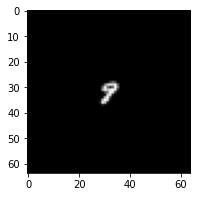

[9, 10, 10, 10, 10]


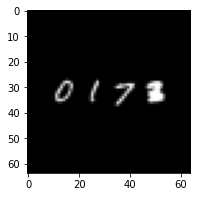

[0, 1, 7, 8, 10]


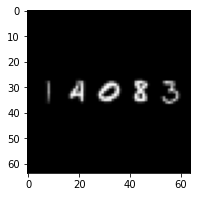

[1, 4, 0, 8, 3]


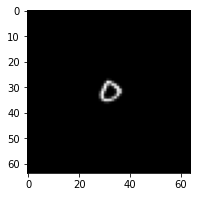

[0, 10, 10, 10, 10]


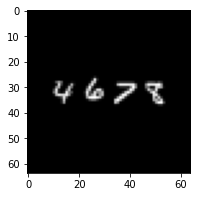

[4, 6, 7, 8, 10]


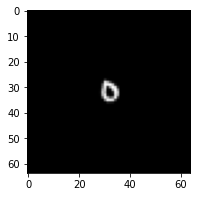

[0, 10, 10, 10, 10]


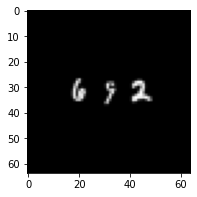

[6, 9, 2, 10, 10]


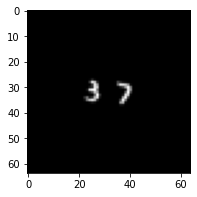

[3, 7, 10, 10, 10]


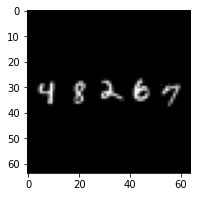

[4, 8, 2, 6, 7]


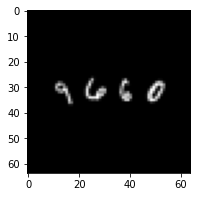

[9, 6, 6, 0, 10]


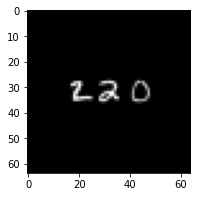

[2, 2, 0, 10, 10]


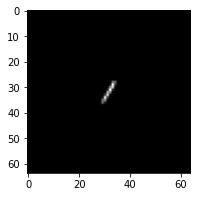

[1, 10, 10, 10, 10]


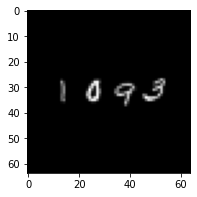

[1, 0, 9, 3, 10]


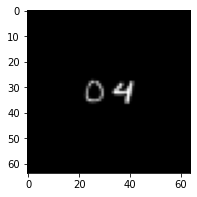

[0, 4, 10, 10, 10]


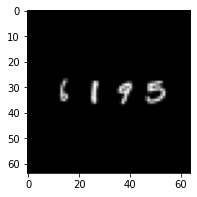

[6, 1, 9, 5, 10]


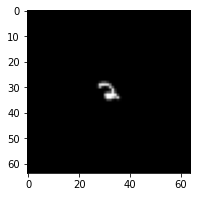

[2, 10, 10, 10, 10]


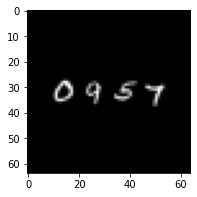

[0, 9, 5, 7, 10]


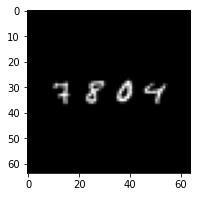

[7, 8, 0, 4, 10]


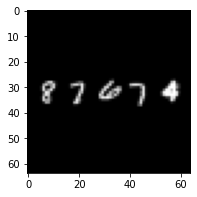

[8, 7, 6, 7, 9]


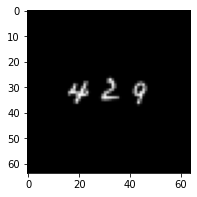

[4, 2, 9, 10, 10]


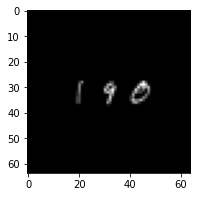

[1, 9, 0, 10, 10]


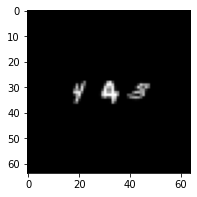

[4, 9, 3, 10, 10]


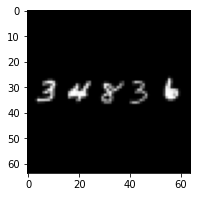

[3, 4, 8, 3, 6]


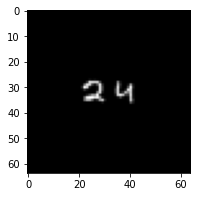

[2, 4, 10, 10, 10]


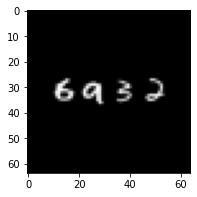

[6, 9, 3, 2, 10]


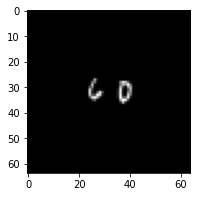

[6, 0, 10, 10, 10]


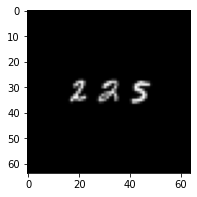

[2, 2, 5, 10, 10]


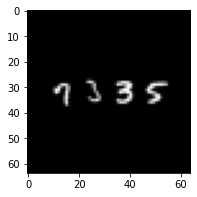

[9, 3, 3, 5, 10]


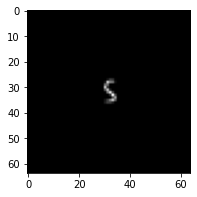

[5, 10, 10, 10, 10]


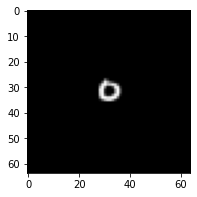

[0, 10, 10, 10, 10]


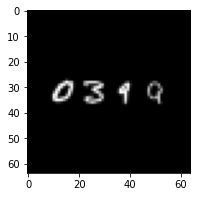

[0, 3, 9, 9, 10]


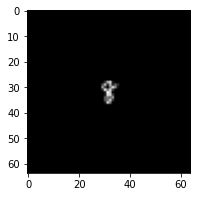

[8, 10, 10, 10, 10]


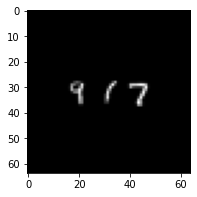

[9, 1, 7, 10, 10]


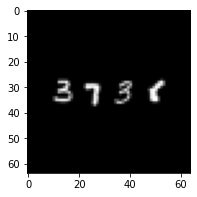

[3, 7, 3, 8, 10]


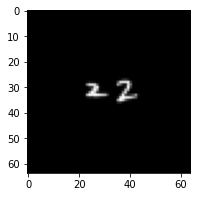

[2, 2, 10, 10, 10]


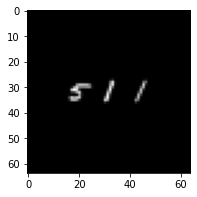

[5, 1, 1, 10, 10]


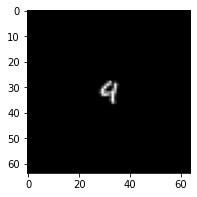

[9, 10, 10, 10, 10]


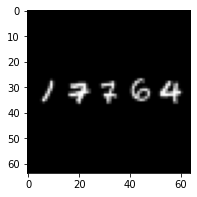

[1, 7, 7, 6, 4]


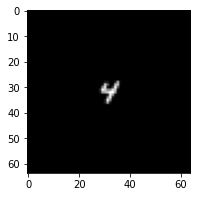

[4, 10, 10, 10, 10]


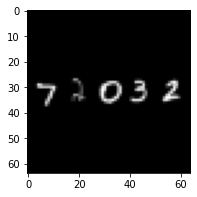

[7, 2, 0, 3, 2]


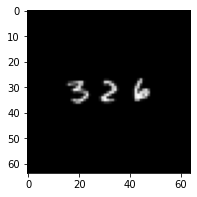

[3, 2, 6, 10, 10]


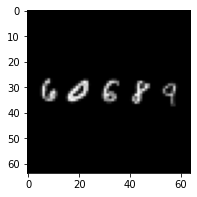

[6, 0, 6, 8, 9]


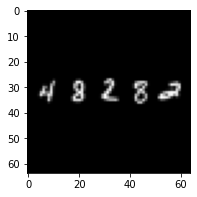

[4, 8, 2, 8, 2]


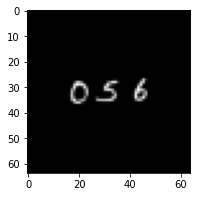

[0, 5, 6, 10, 10]


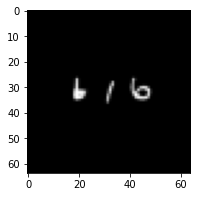

[6, 1, 6, 10, 10]


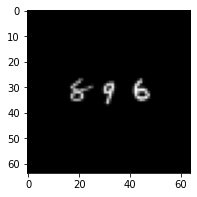

[8, 9, 6, 10, 10]


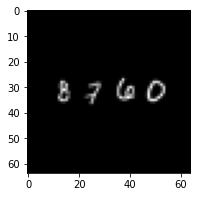

[8, 7, 6, 0, 10]


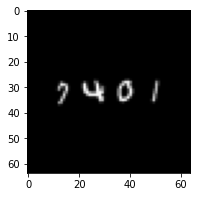

[7, 4, 0, 1, 10]


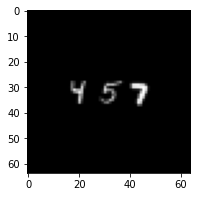

[4, 5, 7, 10, 10]


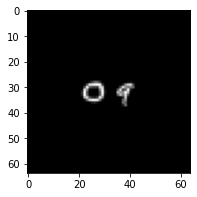

[0, 9, 10, 10, 10]


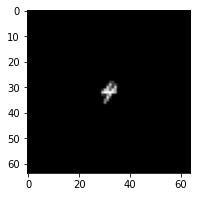

[9, 10, 10, 10, 10]


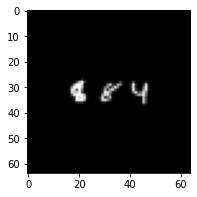

[8, 8, 4, 10, 10]


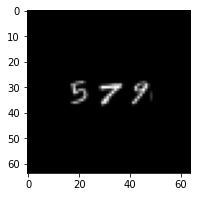

[5, 7, 9, 10, 10]


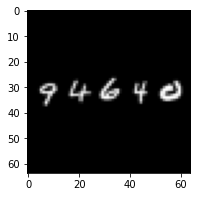

[9, 4, 6, 4, 0]


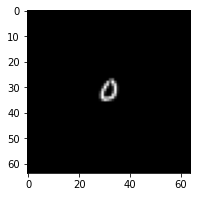

[0, 10, 10, 10, 10]


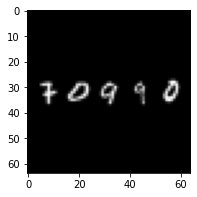

[7, 0, 9, 9, 0]


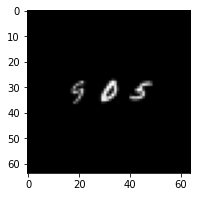

[9, 0, 5, 10, 10]


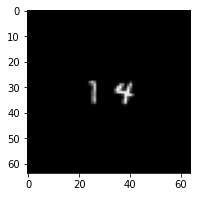

[1, 4, 10, 10, 10]


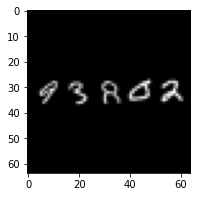

[9, 3, 8, 0, 2]


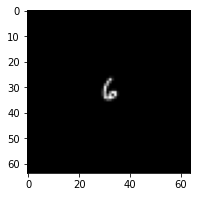

[6, 10, 10, 10, 10]


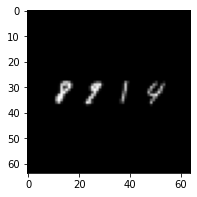

[8, 9, 1, 4, 10]


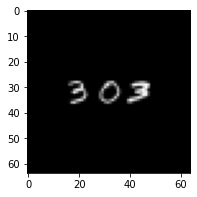

[3, 0, 3, 10, 10]


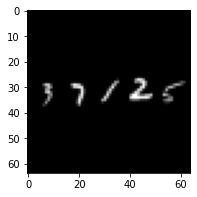

[9, 7, 1, 2, 5]


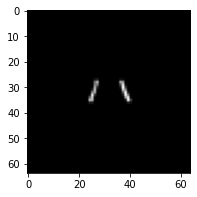

[1, 1, 10, 10, 10]


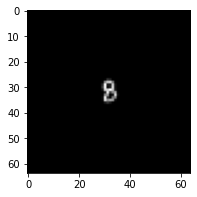

[8, 10, 10, 10, 10]


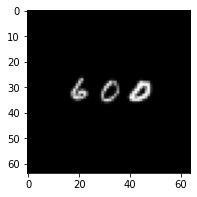

[6, 0, 0, 10, 10]


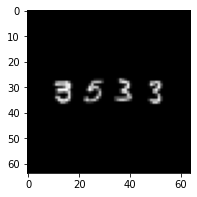

[3, 5, 3, 3, 10]


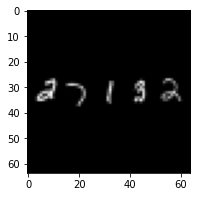

[2, 7, 1, 3, 2]


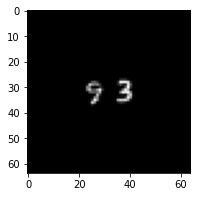

[9, 3, 10, 10, 10]


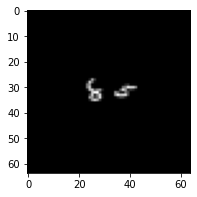

[8, 5, 10, 10, 10]


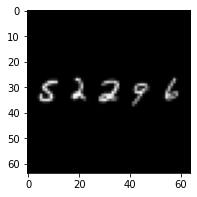

[5, 2, 2, 9, 6]


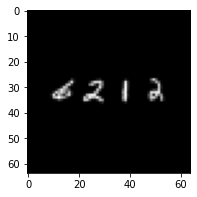

[5, 2, 1, 2, 10]


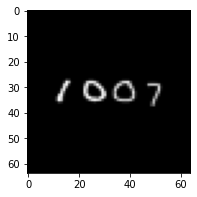

[1, 0, 0, 7, 10]


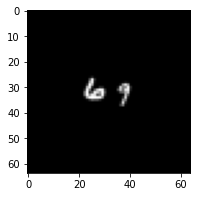

[6, 9, 10, 10, 10]


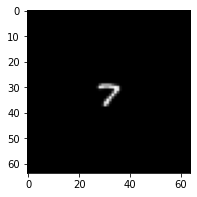

[7, 10, 10, 10, 10]


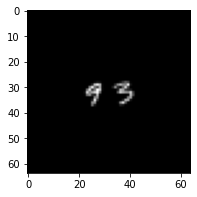

[9, 3, 10, 10, 10]


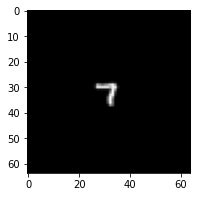

[7, 10, 10, 10, 10]


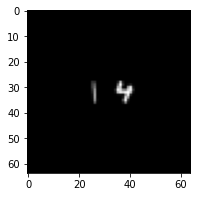

[1, 4, 10, 10, 10]


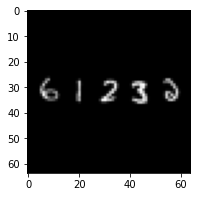

[6, 1, 2, 3, 2]


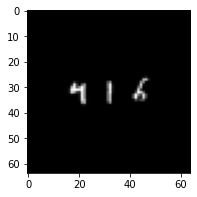

[9, 1, 6, 10, 10]


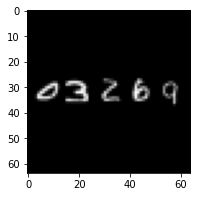

[0, 3, 2, 6, 9]


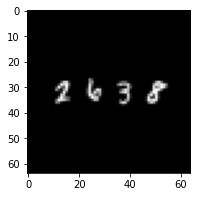

[2, 6, 3, 8, 10]


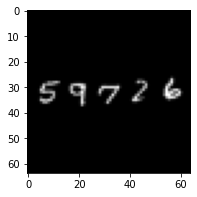

[5, 9, 7, 2, 6]


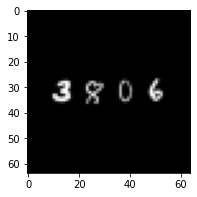

[3, 8, 0, 6, 10]


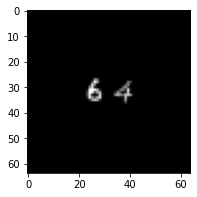

[6, 4, 10, 10, 10]


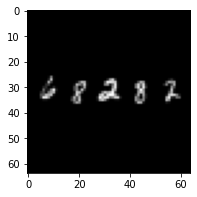

[6, 8, 2, 8, 2]


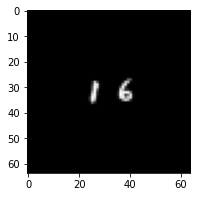

[1, 6, 10, 10, 10]


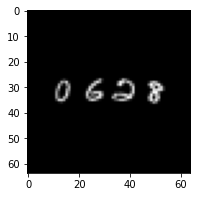

[0, 6, 2, 8, 10]


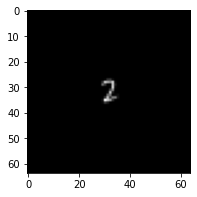

[2, 10, 10, 10, 10]


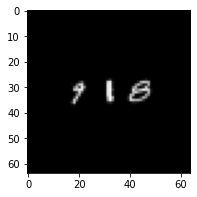

[9, 1, 8, 10, 10]


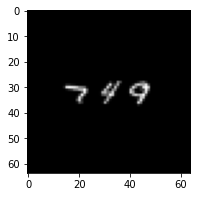

[7, 4, 9, 10, 10]


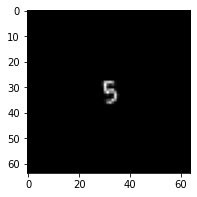

[5, 10, 10, 10, 10]


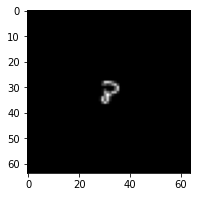

[8, 10, 10, 10, 10]


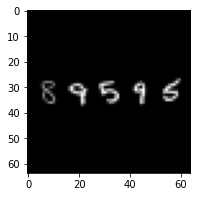

[8, 9, 5, 9, 5]


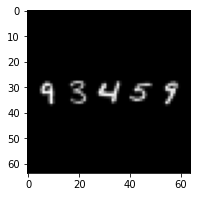

[9, 3, 4, 5, 9]


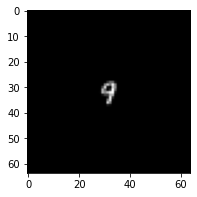

[9, 10, 10, 10, 10]


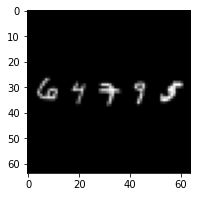

[6, 9, 9, 9, 5]


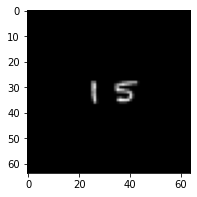

[1, 5, 10, 10, 10]


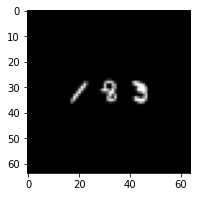

[1, 8, 3, 10, 10]


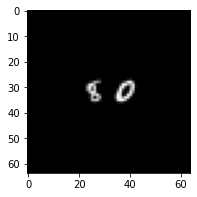

[8, 0, 10, 10, 10]


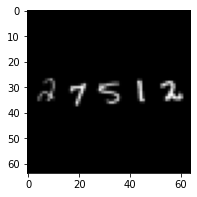

[2, 7, 5, 1, 2]


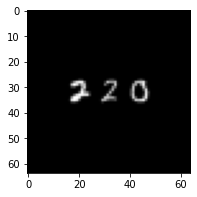

[2, 2, 0, 10, 10]


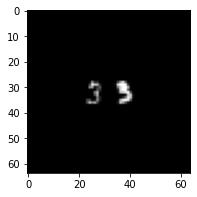

[3, 3, 10, 10, 10]


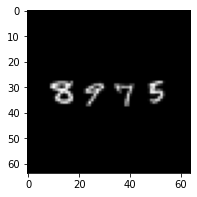

[8, 9, 7, 5, 10]


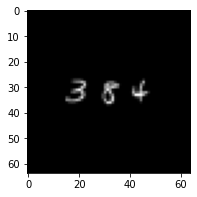

[3, 8, 4, 10, 10]


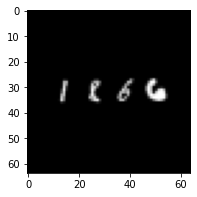

[1, 8, 6, 6, 10]


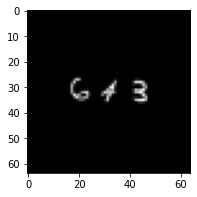

[6, 4, 3, 10, 10]


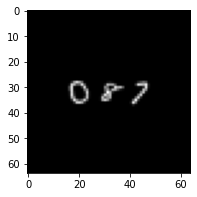

[0, 8, 7, 10, 10]


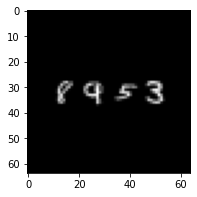

[8, 9, 5, 3, 10]


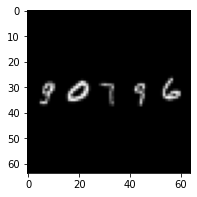

[9, 0, 7, 9, 6]


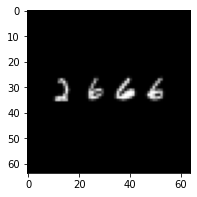

[2, 6, 6, 6, 10]


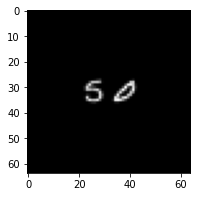

[5, 0, 10, 10, 10]


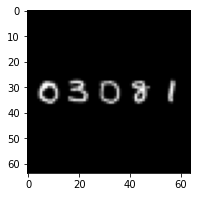

[0, 3, 0, 8, 1]


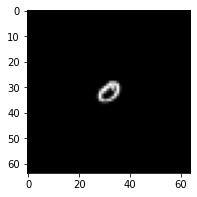

[0, 10, 10, 10, 10]


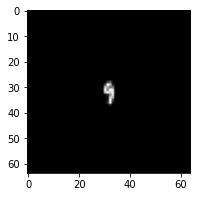

[9, 10, 10, 10, 10]


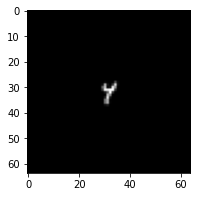

[4, 10, 10, 10, 10]


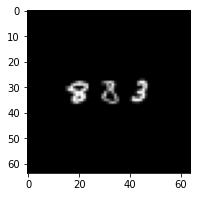

[8, 8, 3, 10, 10]


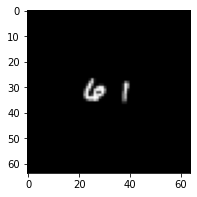

[6, 1, 10, 10, 10]


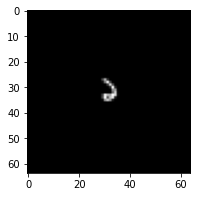

[2, 10, 10, 10, 10]


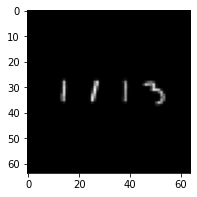

[1, 1, 1, 3, 10]


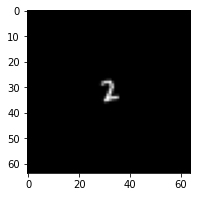

[2, 10, 10, 10, 10]


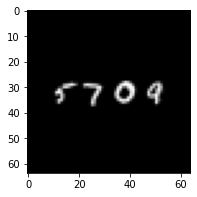

[5, 7, 0, 9, 10]


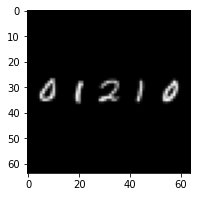

[0, 1, 2, 1, 0]


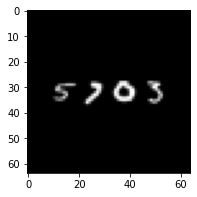

[5, 7, 0, 3, 10]


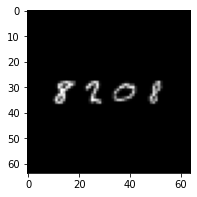

[8, 2, 0, 8, 10]


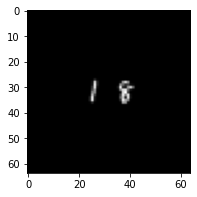

[1, 8, 10, 10, 10]


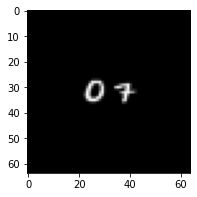

[0, 7, 10, 10, 10]


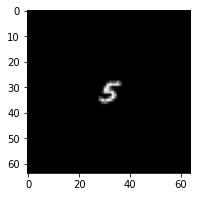

[5, 10, 10, 10, 10]


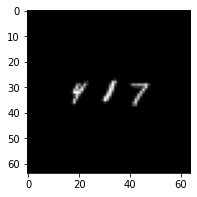

[9, 1, 7, 10, 10]


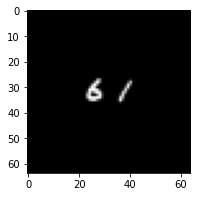

[6, 1, 10, 10, 10]


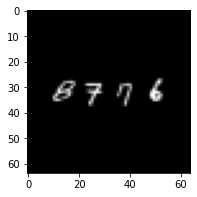

[8, 7, 7, 6, 10]


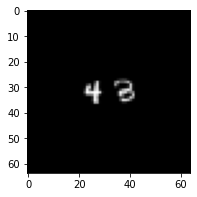

[4, 8, 10, 10, 10]


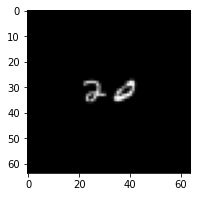

[2, 0, 10, 10, 10]


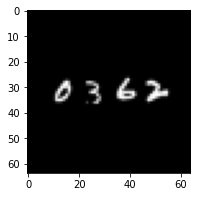

[0, 3, 6, 2, 10]


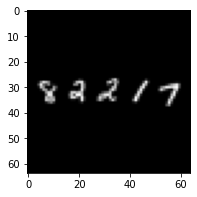

[8, 2, 2, 1, 7]


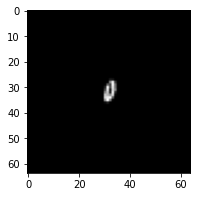

[0, 10, 10, 10, 10]


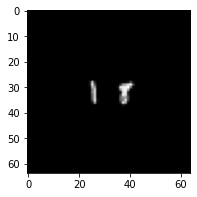

[1, 8, 10, 10, 10]


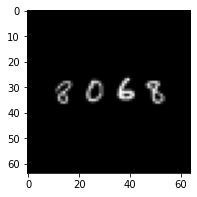

[8, 0, 6, 8, 10]


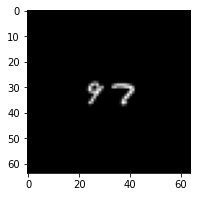

[9, 7, 10, 10, 10]


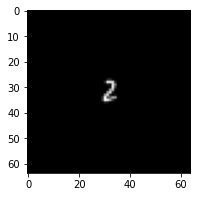

[2, 10, 10, 10, 10]


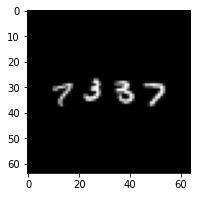

[7, 3, 3, 7, 10]


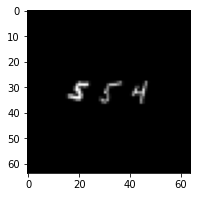

[5, 5, 4, 10, 10]


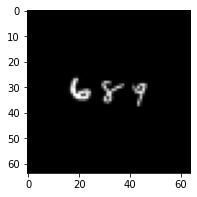

[6, 8, 9, 10, 10]


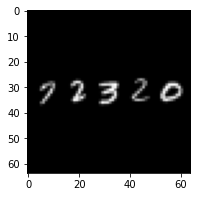

[7, 2, 3, 2, 0]


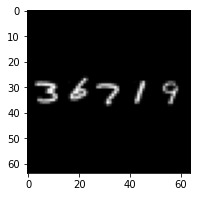

[3, 6, 7, 1, 9]


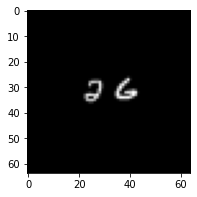

[2, 6, 10, 10, 10]


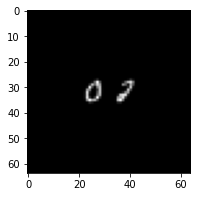

[0, 2, 10, 10, 10]


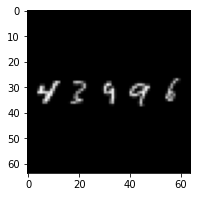

[4, 2, 9, 9, 6]


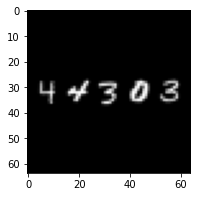

[4, 4, 3, 0, 3]


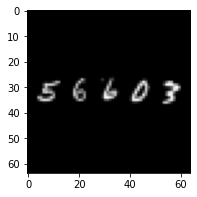

[5, 6, 6, 0, 3]


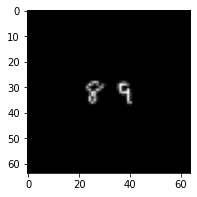

[8, 9, 10, 10, 10]


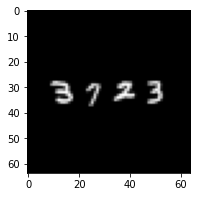

[3, 7, 2, 3, 10]


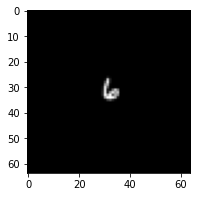

[6, 10, 10, 10, 10]


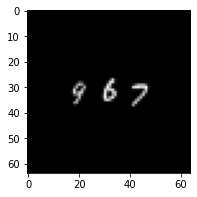

[9, 6, 7, 10, 10]


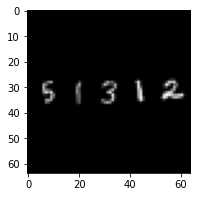

[5, 1, 3, 1, 2]


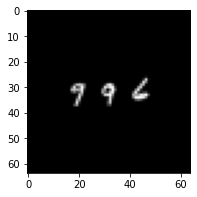

[9, 9, 6, 10, 10]


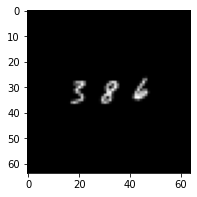

[3, 8, 6, 10, 10]


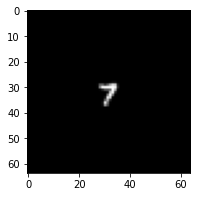

[7, 10, 10, 10, 10]


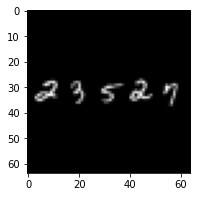

[2, 3, 5, 2, 7]


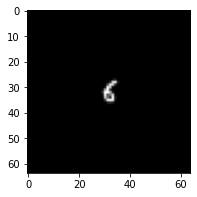

[6, 10, 10, 10, 10]


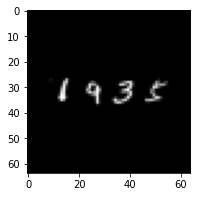

[1, 9, 3, 5, 10]


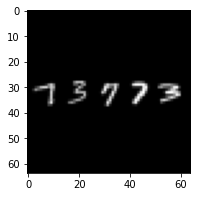

[7, 3, 7, 7, 3]


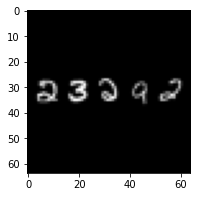

[2, 3, 2, 9, 2]


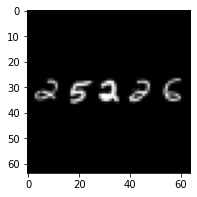

[2, 5, 2, 2, 6]


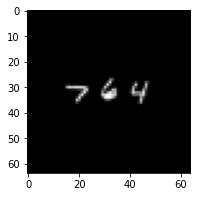

[7, 6, 4, 10, 10]


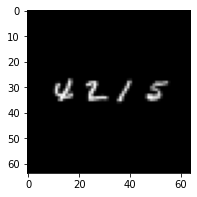

[4, 2, 1, 5, 10]


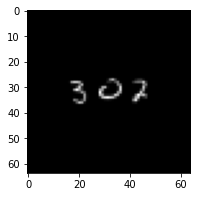

[3, 0, 2, 10, 10]


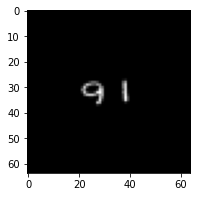

[9, 1, 10, 10, 10]


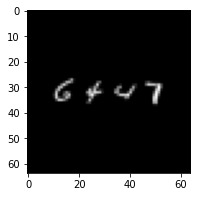

[6, 4, 4, 7, 10]


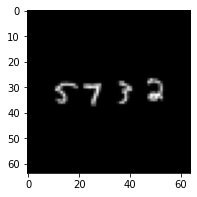

[5, 7, 3, 2, 10]


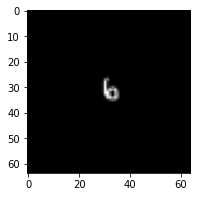

[6, 10, 10, 10, 10]


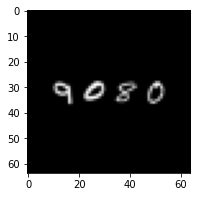

[9, 0, 8, 0, 10]


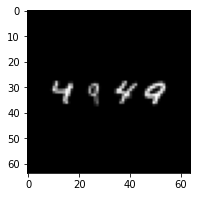

[9, 9, 4, 9, 10]


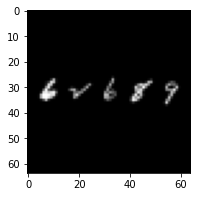

[6, 8, 6, 8, 9]


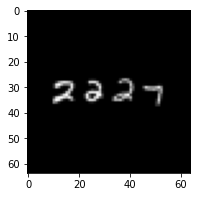

[2, 2, 2, 7, 10]


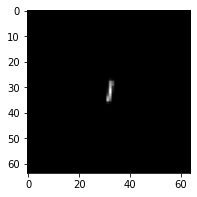

[1, 10, 10, 10, 10]


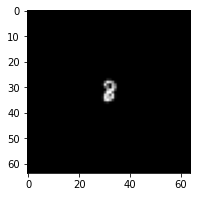

[8, 10, 10, 10, 10]


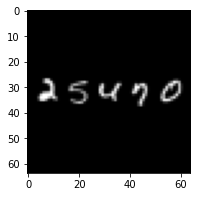

[2, 5, 4, 7, 0]


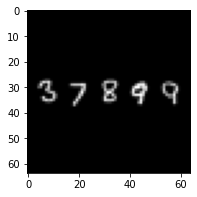

[3, 7, 8, 9, 9]


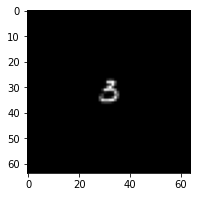

[3, 10, 10, 10, 10]


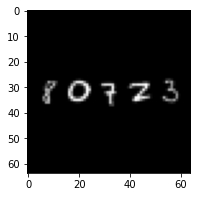

[8, 0, 7, 2, 3]


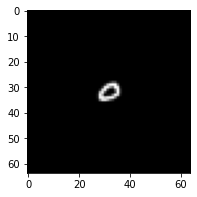

[0, 10, 10, 10, 10]


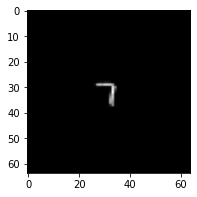

[7, 10, 10, 10, 10]


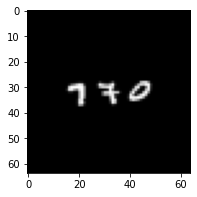

[9, 7, 0, 10, 10]


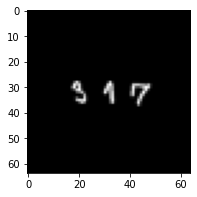

[9, 9, 7, 10, 10]


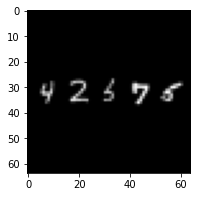

[4, 2, 5, 7, 5]


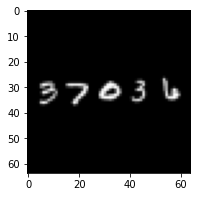

[3, 7, 0, 3, 6]


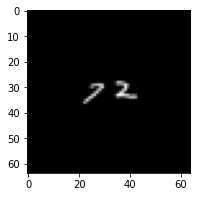

[7, 2, 10, 10, 10]


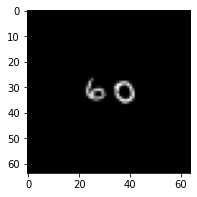

[6, 0, 10, 10, 10]


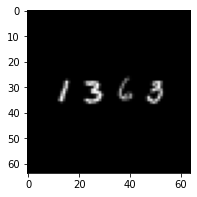

[1, 3, 6, 3, 10]


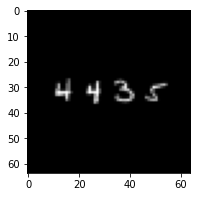

[4, 4, 3, 5, 10]


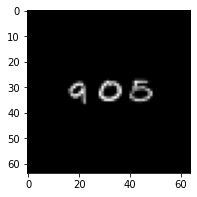

[9, 0, 5, 10, 10]


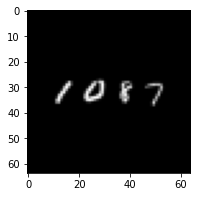

[1, 0, 8, 7, 10]


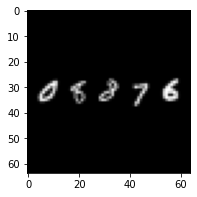

[0, 8, 8, 7, 6]


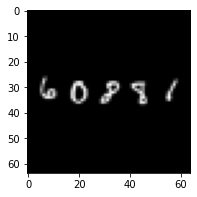

[6, 0, 8, 8, 1]


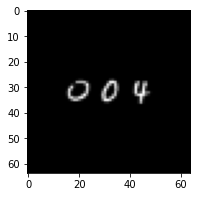

[0, 0, 4, 10, 10]


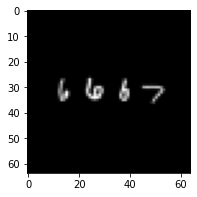

[6, 6, 8, 7, 10]


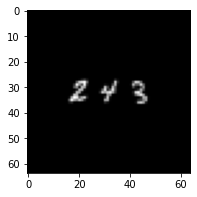

[2, 4, 3, 10, 10]


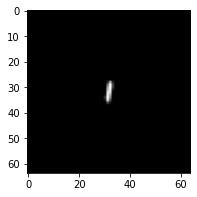

[1, 10, 10, 10, 10]


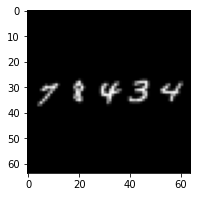

[7, 8, 4, 3, 4]


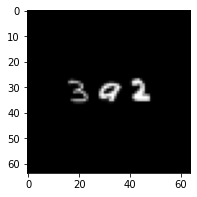

[3, 9, 2, 10, 10]


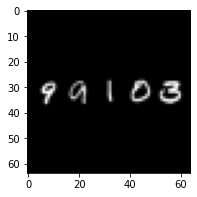

[9, 9, 1, 0, 3]


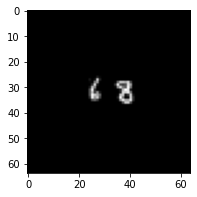

[6, 8, 10, 10, 10]


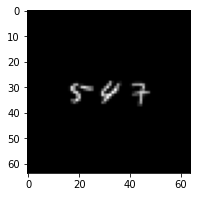

[5, 4, 7, 10, 10]


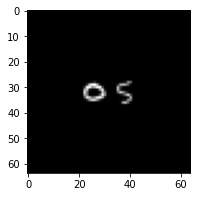

[0, 5, 10, 10, 10]


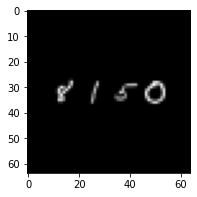

[8, 1, 5, 0, 10]


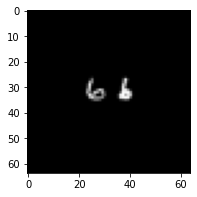

[6, 6, 10, 10, 10]


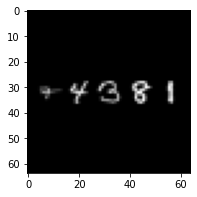

[9, 4, 9, 8, 1]


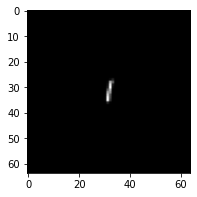

[1, 10, 10, 10, 10]


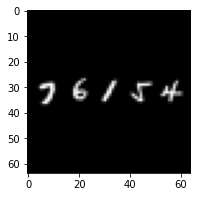

[7, 6, 1, 5, 4]


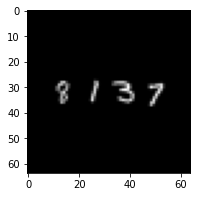

[8, 1, 3, 7, 10]


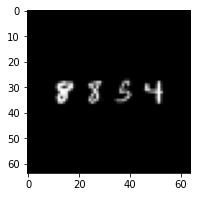

[8, 8, 5, 4, 10]


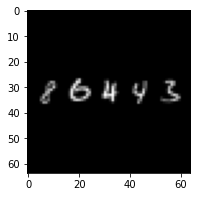

[8, 6, 4, 4, 3]


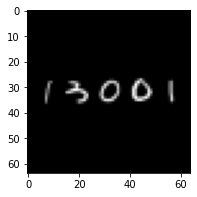

[1, 3, 0, 0, 1]


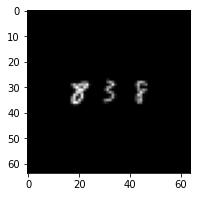

[8, 3, 8, 10, 10]


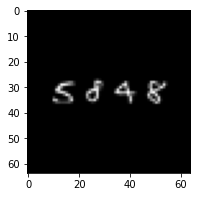

[5, 8, 9, 8, 10]


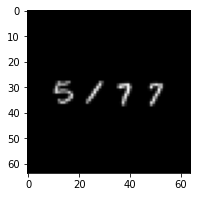

[5, 1, 7, 7, 10]


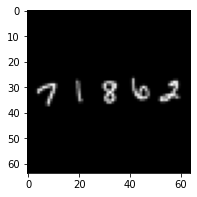

[7, 1, 8, 6, 2]


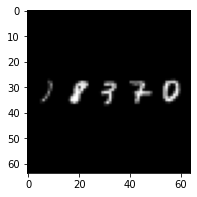

[1, 8, 3, 7, 0]


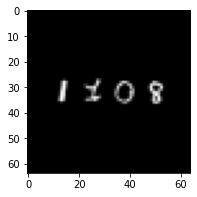

[1, 2, 0, 8, 10]


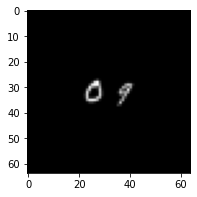

[0, 9, 10, 10, 10]


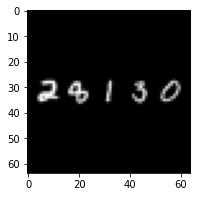

[2, 8, 1, 3, 0]


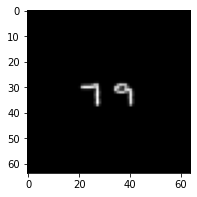

[7, 9, 10, 10, 10]


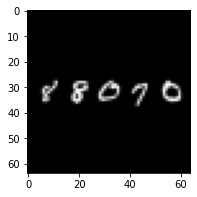

[8, 8, 0, 7, 0]


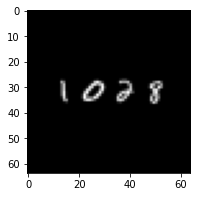

[1, 0, 2, 8, 10]


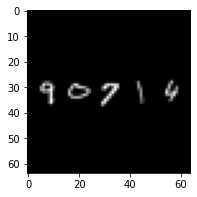

[9, 0, 7, 1, 4]


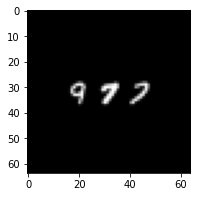

[9, 7, 7, 10, 10]


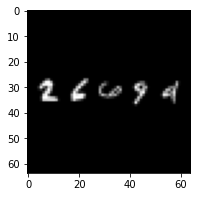

[2, 6, 6, 9, 4]


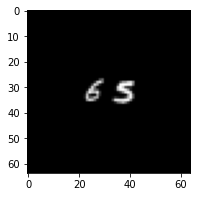

[6, 5, 10, 10, 10]


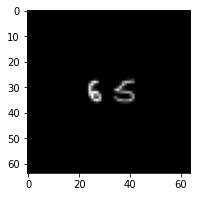

[6, 5, 10, 10, 10]


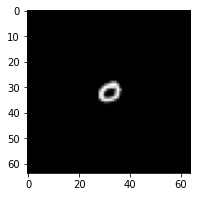

[0, 10, 10, 10, 10]


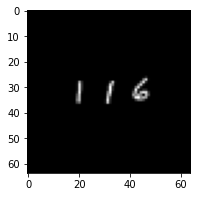

[1, 1, 6, 10, 10]


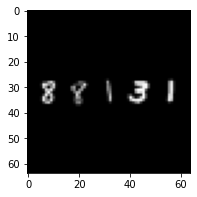

[8, 8, 1, 3, 1]


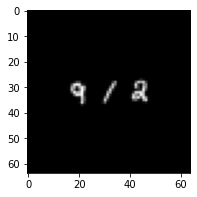

[9, 1, 2, 10, 10]


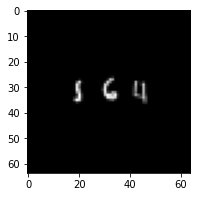

[1, 6, 4, 10, 10]


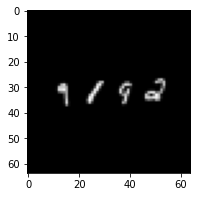

[9, 1, 9, 2, 10]


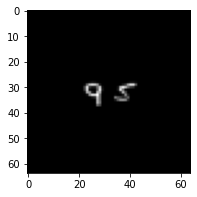

[9, 5, 10, 10, 10]


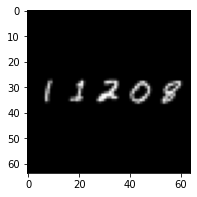

[1, 1, 2, 0, 8]


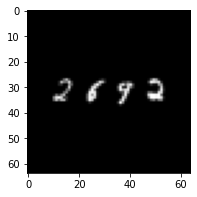

[2, 8, 9, 2, 10]


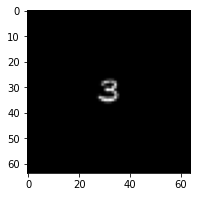

[3, 10, 10, 10, 10]


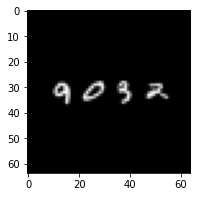

[9, 0, 9, 2, 10]


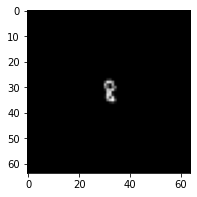

[8, 10, 10, 10, 10]


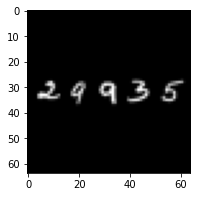

[2, 9, 9, 3, 5]


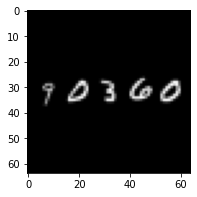

[9, 0, 3, 6, 0]


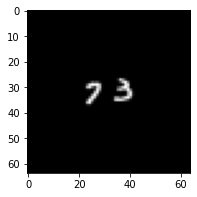

[7, 3, 10, 10, 10]


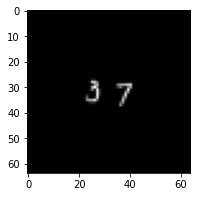

[3, 7, 10, 10, 10]


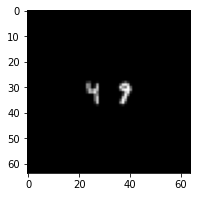

[4, 9, 10, 10, 10]


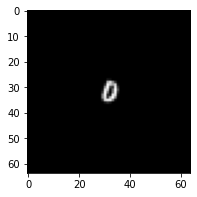

[0, 10, 10, 10, 10]


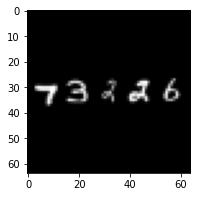

[7, 3, 2, 2, 6]


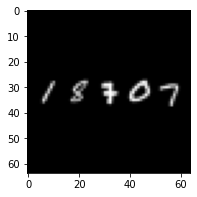

[1, 8, 7, 0, 7]


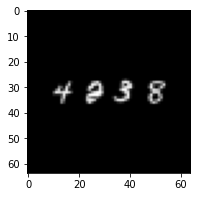

[4, 2, 3, 8, 10]


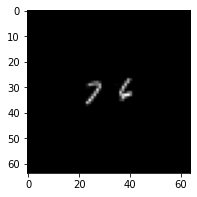

[7, 6, 10, 10, 10]


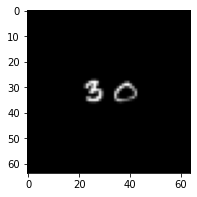

[3, 0, 10, 10, 10]


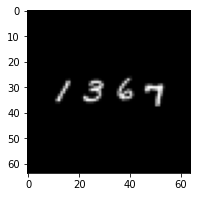

[1, 3, 6, 7, 10]


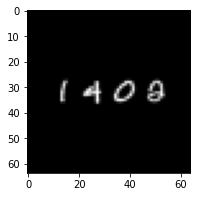

[1, 4, 0, 2, 10]


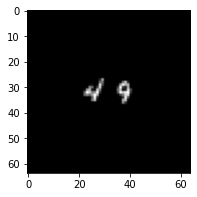

[4, 9, 10, 10, 10]


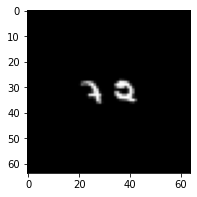

[7, 2, 10, 10, 10]


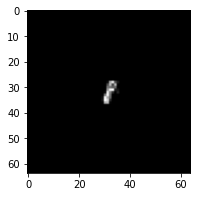

[8, 10, 10, 10, 10]


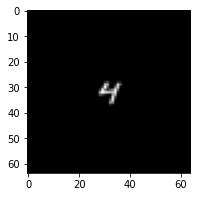

[4, 10, 10, 10, 10]


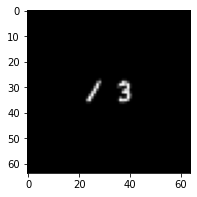

[1, 3, 10, 10, 10]


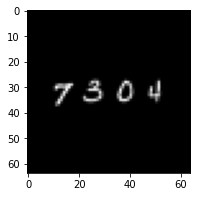

[7, 3, 0, 4, 10]


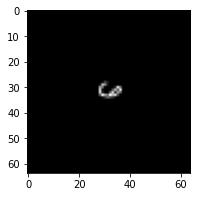

[6, 10, 10, 10, 10]


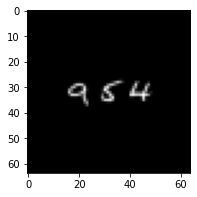

[9, 5, 4, 10, 10]


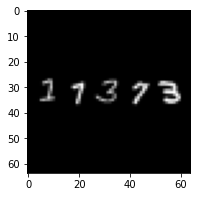

[2, 7, 3, 7, 3]


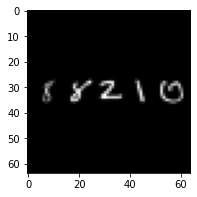

[8, 8, 2, 1, 5]


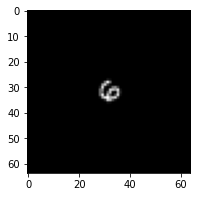

[6, 10, 10, 10, 10]


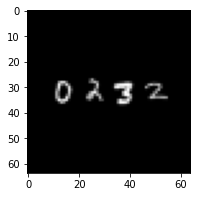

[0, 2, 3, 2, 10]


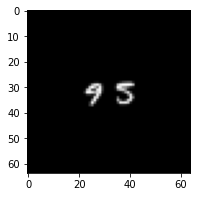

[9, 5, 10, 10, 10]


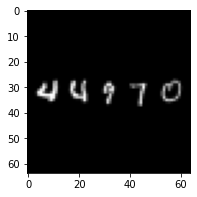

[4, 4, 9, 7, 0]


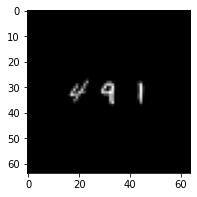

[4, 9, 1, 10, 10]


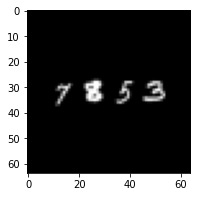

[7, 8, 5, 3, 10]


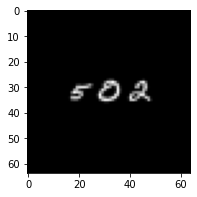

[5, 0, 2, 10, 10]


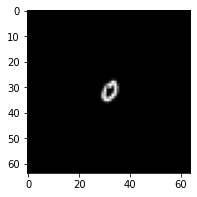

[0, 10, 10, 10, 10]


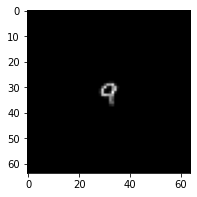

[9, 10, 10, 10, 10]


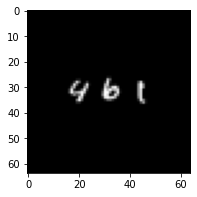

[9, 6, 1, 10, 10]


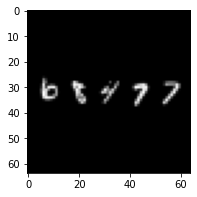

[6, 8, 4, 7, 7]


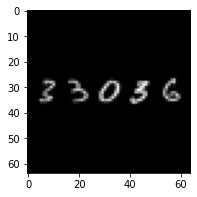

[3, 3, 0, 3, 6]


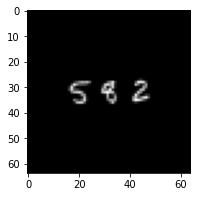

[5, 8, 2, 10, 10]


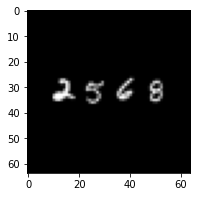

[2, 5, 6, 8, 10]


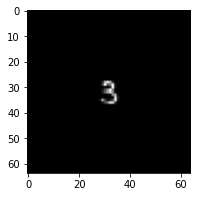

[3, 10, 10, 10, 10]


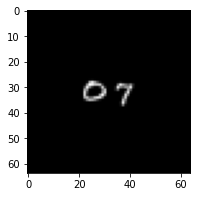

[0, 7, 10, 10, 10]


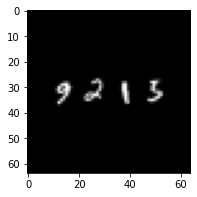

[9, 2, 1, 5, 10]


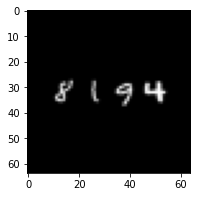

[8, 1, 9, 4, 10]


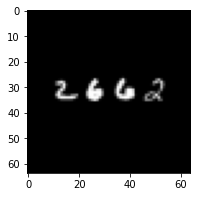

[2, 6, 6, 2, 10]


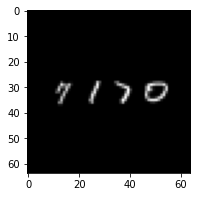

[7, 1, 7, 0, 10]


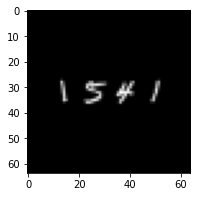

[1, 5, 4, 1, 10]


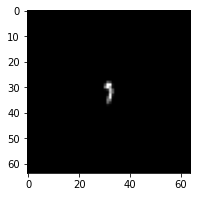

[9, 10, 10, 10, 10]


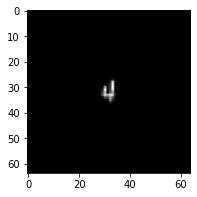

[4, 10, 10, 10, 10]


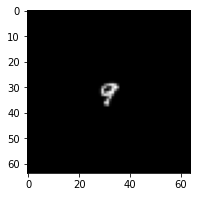

[9, 10, 10, 10, 10]


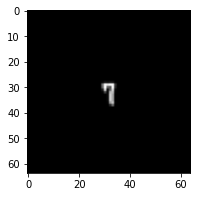

[7, 10, 10, 10, 10]


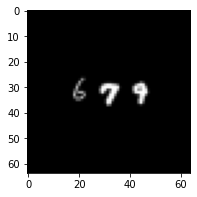

[6, 7, 9, 10, 10]


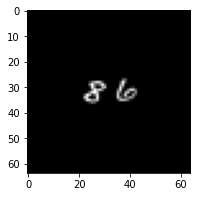

[8, 6, 10, 10, 10]


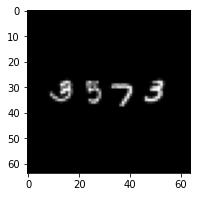

[3, 5, 7, 3, 10]


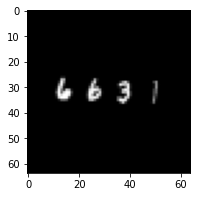

[6, 6, 3, 1, 10]


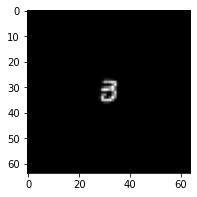

[3, 10, 10, 10, 10]


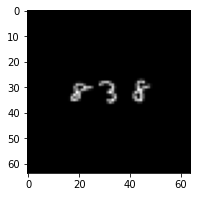

[8, 3, 8, 10, 10]


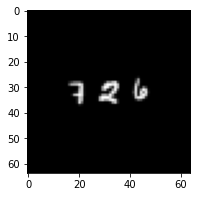

[7, 2, 6, 10, 10]


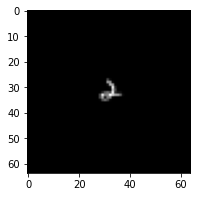

[2, 10, 10, 10, 10]


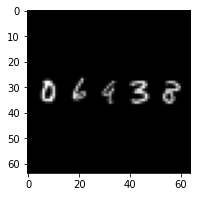

[0, 6, 9, 3, 8]


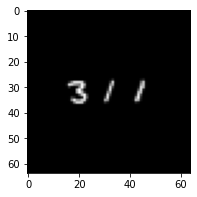

[3, 1, 1, 10, 10]


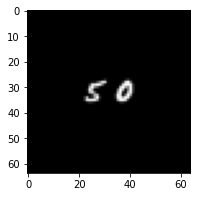

[5, 0, 10, 10, 10]


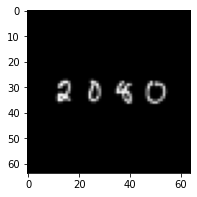

[2, 0, 8, 0, 10]


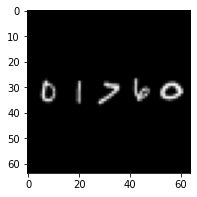

[0, 1, 7, 6, 0]


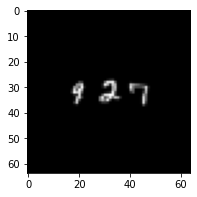

[9, 2, 7, 10, 10]


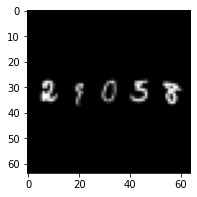

[2, 9, 0, 5, 8]


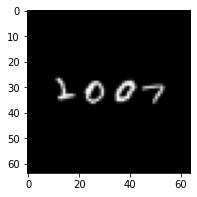

[2, 0, 0, 7, 10]


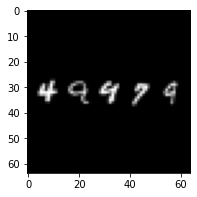

[4, 9, 9, 7, 9]


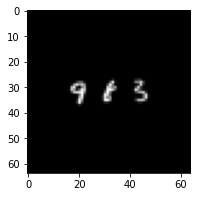

[9, 8, 3, 10, 10]


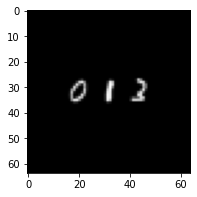

[0, 1, 3, 10, 10]


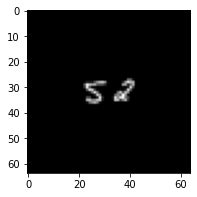

[5, 2, 10, 10, 10]


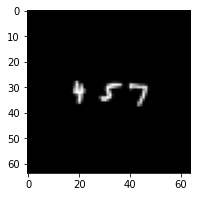

[9, 5, 7, 10, 10]


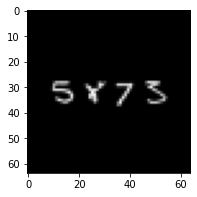

[5, 8, 7, 5, 10]


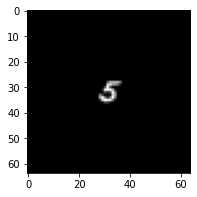

[5, 10, 10, 10, 10]


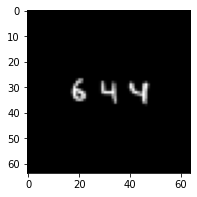

[6, 4, 4, 10, 10]


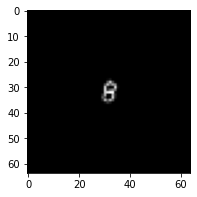

[8, 10, 10, 10, 10]


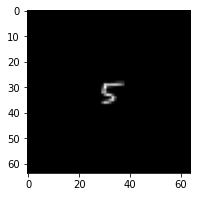

[5, 10, 10, 10, 10]


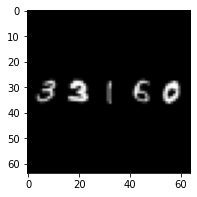

[3, 3, 1, 6, 0]


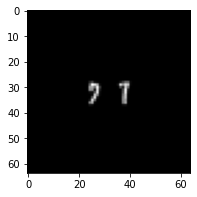

[9, 7, 10, 10, 10]


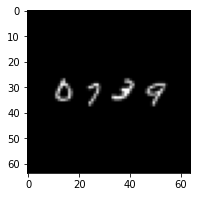

[0, 7, 3, 9, 10]


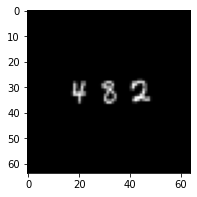

[4, 8, 2, 10, 10]


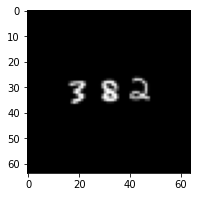

[3, 8, 2, 10, 10]


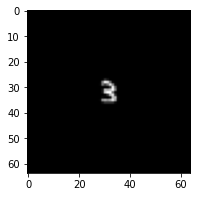

[3, 10, 10, 10, 10]


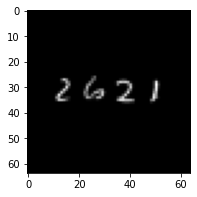

[2, 6, 2, 1, 10]


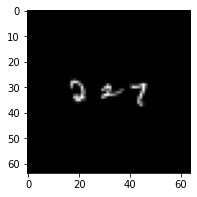

[2, 2, 7, 10, 10]


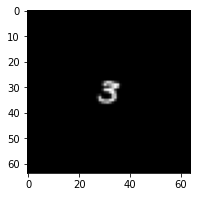

[3, 10, 10, 10, 10]


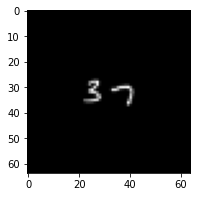

[3, 7, 10, 10, 10]


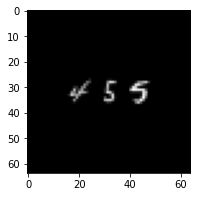

[4, 5, 5, 10, 10]


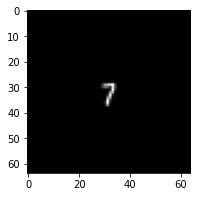

[7, 10, 10, 10, 10]


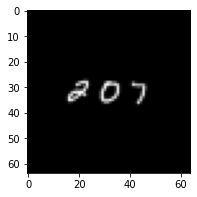

[2, 0, 7, 10, 10]


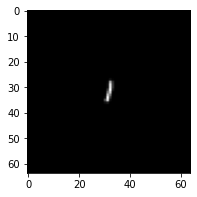

[1, 10, 10, 10, 10]


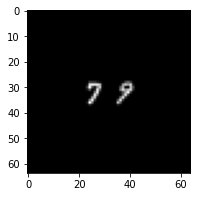

[7, 9, 10, 10, 10]


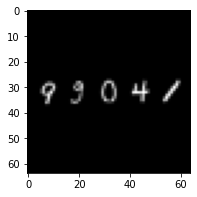

[9, 9, 0, 4, 1]


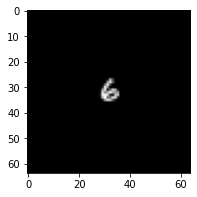

[6, 10, 10, 10, 10]


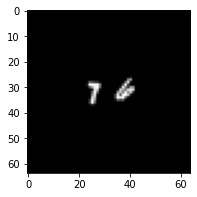

[7, 6, 10, 10, 10]


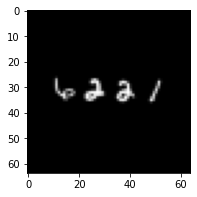

[6, 2, 2, 1, 10]


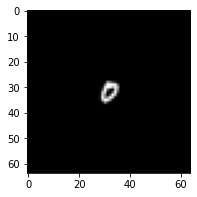

[0, 10, 10, 10, 10]


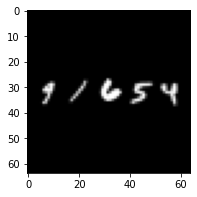

[9, 1, 6, 5, 9]


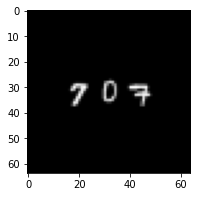

[7, 0, 7, 10, 10]


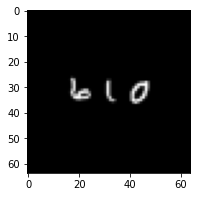

[6, 1, 0, 10, 10]


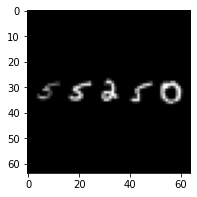

[5, 5, 2, 5, 0]


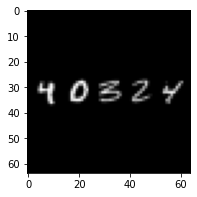

[9, 0, 8, 2, 4]


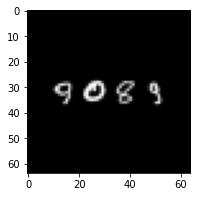

[9, 0, 8, 9, 10]


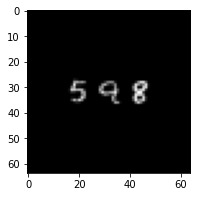

[5, 9, 8, 10, 10]


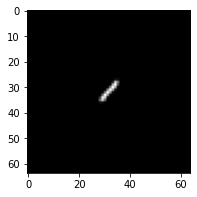

[1, 10, 10, 10, 10]


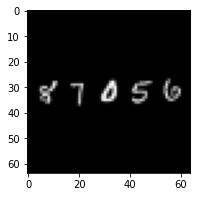

[8, 7, 0, 5, 6]


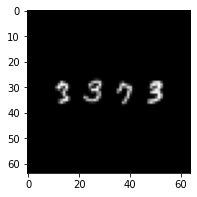

[3, 3, 7, 3, 10]


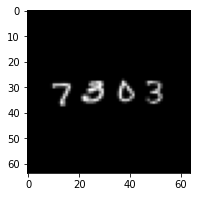

[7, 3, 0, 3, 10]


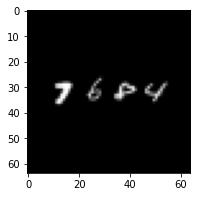

[7, 6, 8, 4, 10]


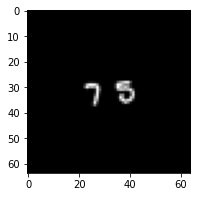

[7, 5, 10, 10, 10]


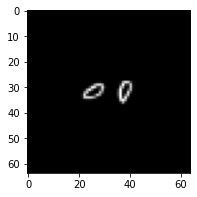

[0, 0, 10, 10, 10]


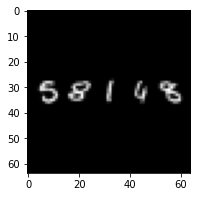

[5, 8, 1, 4, 8]


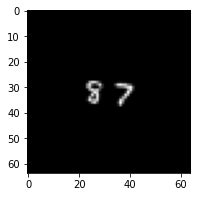

[8, 7, 10, 10, 10]


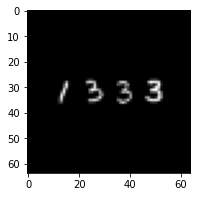

[1, 3, 3, 3, 10]


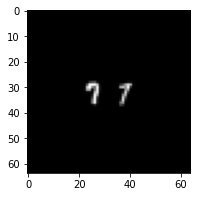

[7, 7, 10, 10, 10]


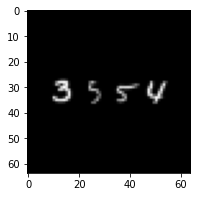

[3, 5, 5, 4, 10]


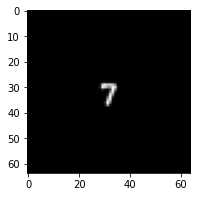

[7, 10, 10, 10, 10]


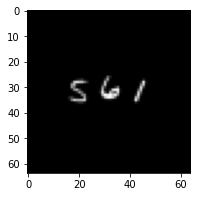

[5, 6, 1, 10, 10]


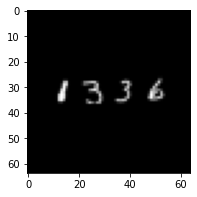

[1, 3, 3, 6, 10]


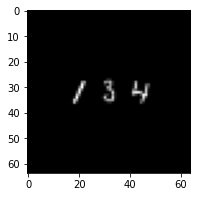

[1, 3, 4, 10, 10]


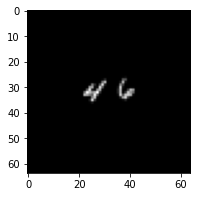

[4, 6, 10, 10, 10]


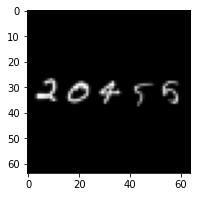

[2, 0, 4, 5, 5]


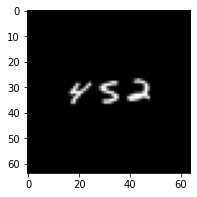

[4, 5, 2, 10, 10]


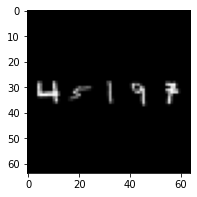

[4, 5, 1, 9, 7]


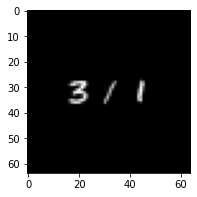

[3, 1, 1, 10, 10]


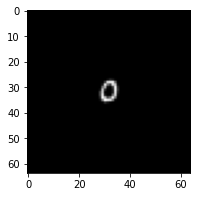

[0, 10, 10, 10, 10]


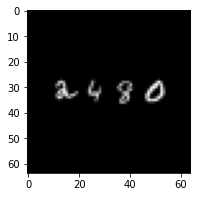

[2, 4, 8, 0, 10]


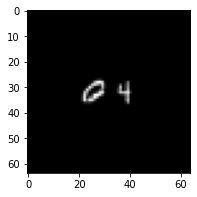

[0, 4, 10, 10, 10]


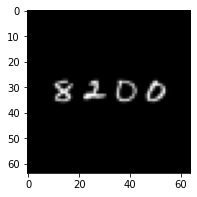

[8, 2, 0, 0, 10]


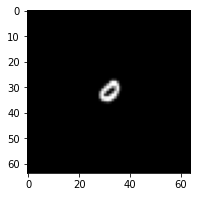

[0, 10, 10, 10, 10]


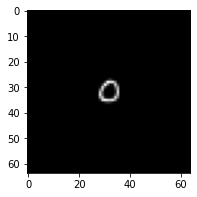

[0, 10, 10, 10, 10]


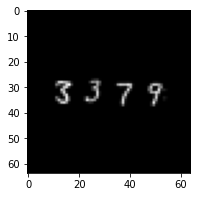

[3, 3, 7, 9, 10]


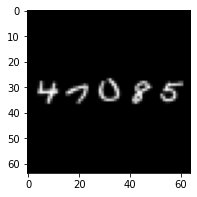

[4, 7, 0, 8, 5]


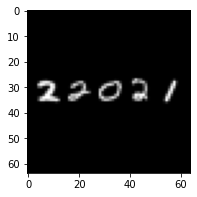

[2, 2, 0, 2, 1]


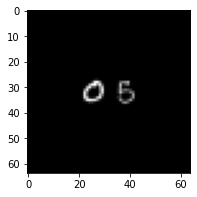

[0, 5, 10, 10, 10]


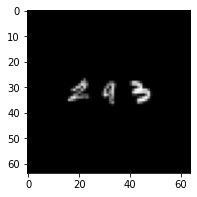

[2, 9, 3, 10, 10]


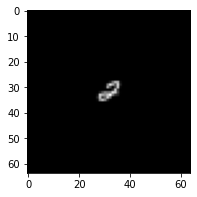

[2, 10, 10, 10, 10]


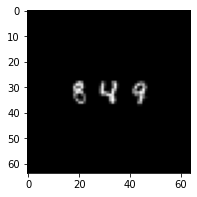

[8, 4, 9, 10, 10]


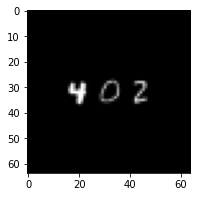

[4, 0, 2, 10, 10]


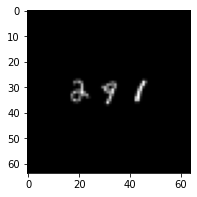

[2, 9, 1, 10, 10]


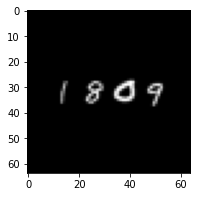

[1, 8, 0, 9, 10]


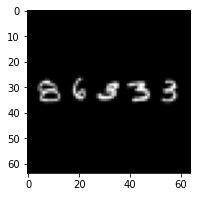

[8, 6, 3, 3, 3]


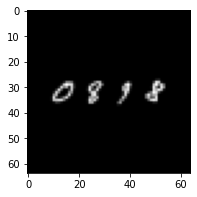

[0, 8, 9, 8, 10]


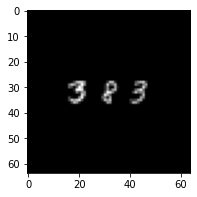

[3, 8, 3, 10, 10]


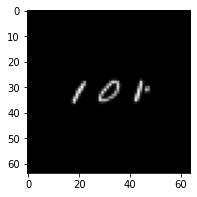

[1, 0, 8, 10, 10]


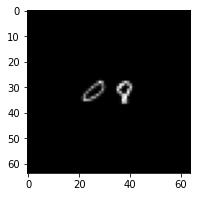

[0, 8, 10, 10, 10]


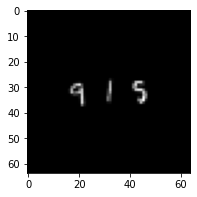

[9, 1, 5, 10, 10]


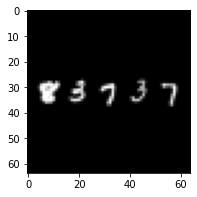

[8, 3, 7, 3, 7]


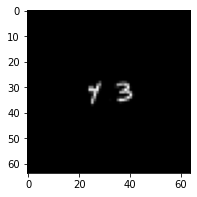

[4, 3, 10, 10, 10]


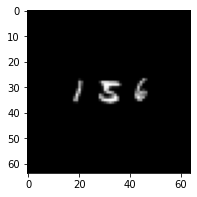

[1, 5, 6, 10, 10]


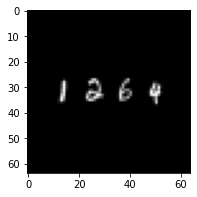

[1, 2, 6, 9, 10]


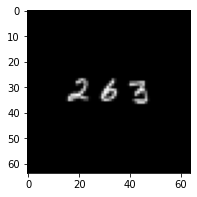

[2, 6, 3, 10, 10]


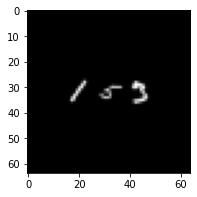

[1, 5, 3, 10, 10]


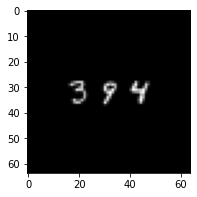

[3, 9, 4, 10, 10]


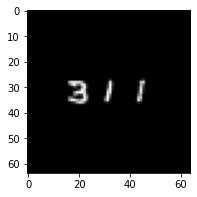

[3, 1, 1, 10, 10]


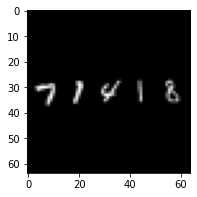

[7, 1, 4, 1, 8]


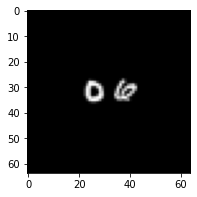

[0, 6, 10, 10, 10]


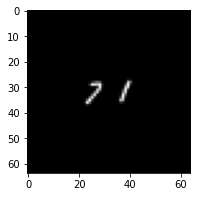

[7, 1, 10, 10, 10]


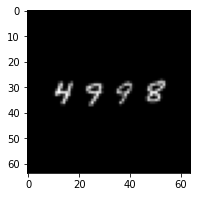

[4, 9, 9, 8, 10]


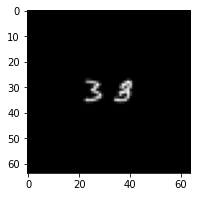

[3, 3, 10, 10, 10]


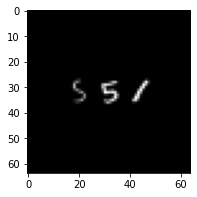

[5, 5, 1, 10, 10]


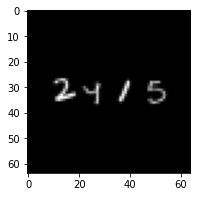

[2, 9, 1, 5, 10]


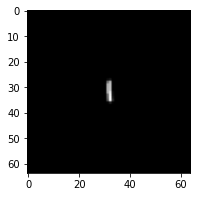

[1, 10, 10, 10, 10]


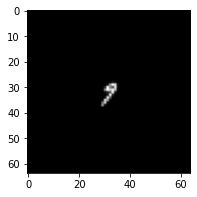

[9, 10, 10, 10, 10]


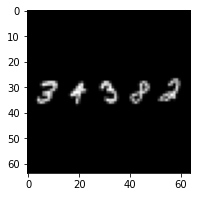

[3, 4, 3, 8, 2]


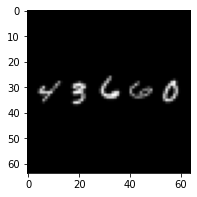

[4, 3, 6, 6, 0]


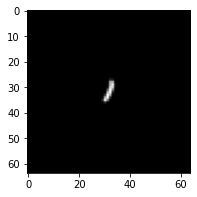

[1, 10, 10, 10, 10]


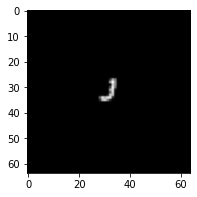

[3, 10, 10, 10, 10]


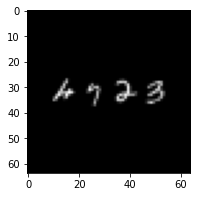

[2, 7, 2, 3, 10]


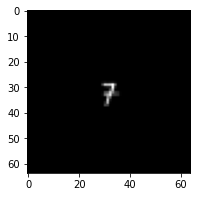

[7, 10, 10, 10, 10]


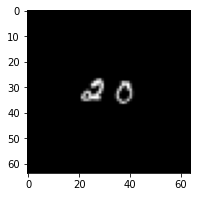

[2, 0, 10, 10, 10]


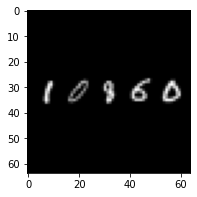

[1, 0, 8, 6, 0]


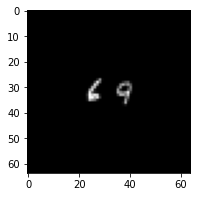

[6, 9, 10, 10, 10]


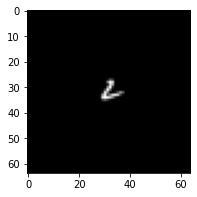

[2, 10, 10, 10, 10]


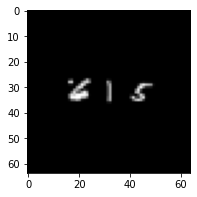

[6, 1, 5, 10, 10]


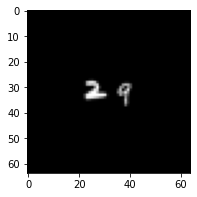

[2, 9, 10, 10, 10]


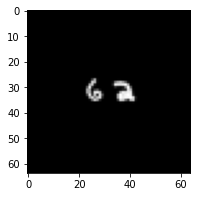

[6, 2, 10, 10, 10]


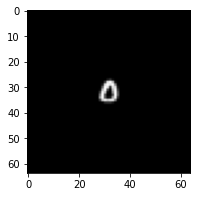

[0, 10, 10, 10, 10]


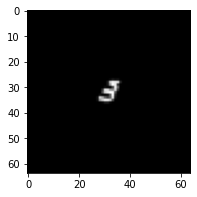

[3, 10, 10, 10, 10]


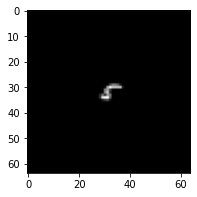

[5, 10, 10, 10, 10]


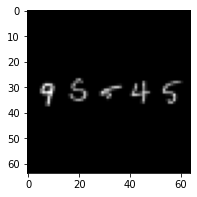

[9, 5, 5, 4, 5]


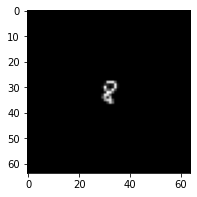

[8, 10, 10, 10, 10]


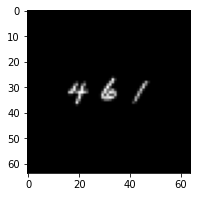

[4, 6, 1, 10, 10]


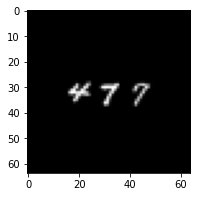

[4, 7, 7, 10, 10]


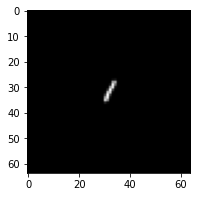

[1, 10, 10, 10, 10]


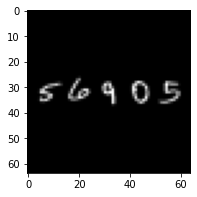

[5, 6, 9, 0, 5]


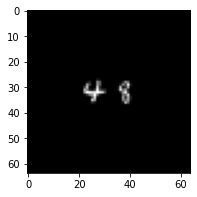

[4, 8, 10, 10, 10]


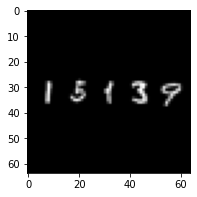

[1, 5, 1, 3, 9]


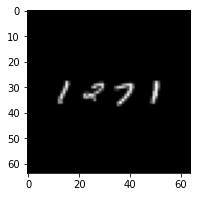

[1, 2, 7, 1, 10]


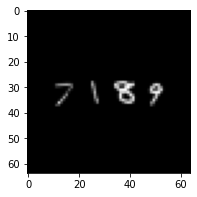

[7, 1, 8, 9, 10]


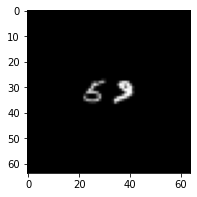

[5, 9, 10, 10, 10]


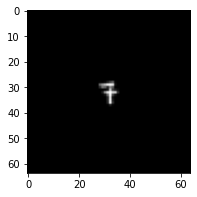

[7, 10, 10, 10, 10]


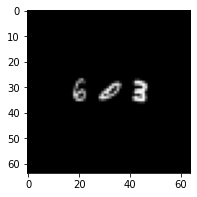

[6, 0, 3, 10, 10]


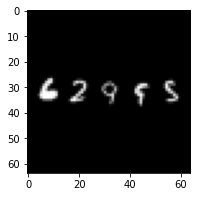

[6, 2, 9, 9, 5]


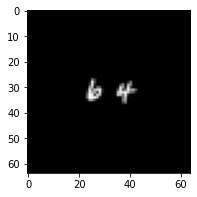

[6, 4, 10, 10, 10]


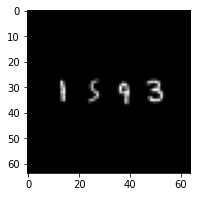

[1, 5, 9, 3, 10]


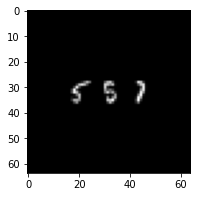

[5, 5, 7, 10, 10]


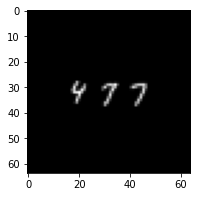

[9, 7, 7, 10, 10]


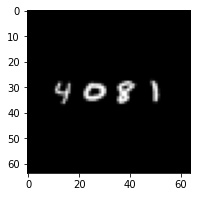

[4, 0, 8, 1, 10]


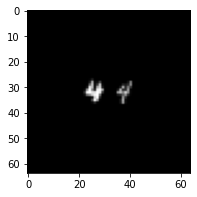

[4, 4, 10, 10, 10]


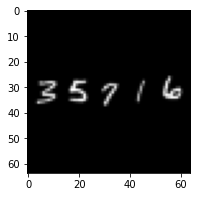

[3, 5, 7, 1, 6]


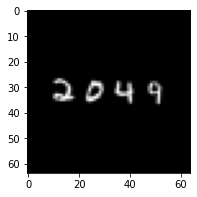

[2, 0, 4, 9, 10]


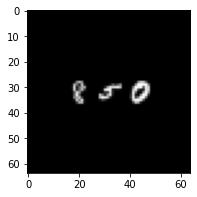

[8, 5, 0, 10, 10]


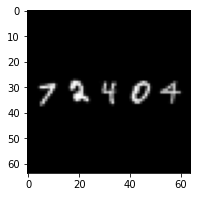

[7, 2, 4, 0, 4]


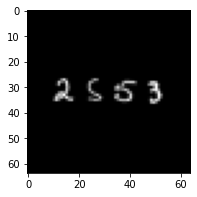

[2, 5, 5, 3, 10]


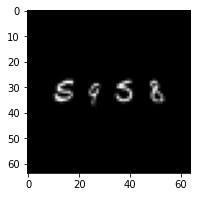

[5, 9, 5, 8, 10]


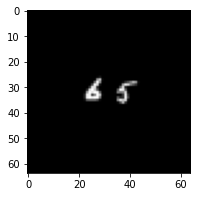

[6, 5, 10, 10, 10]


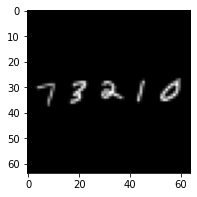

[7, 3, 2, 1, 0]


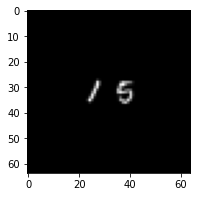

[1, 5, 10, 10, 10]


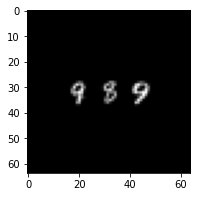

[9, 8, 9, 10, 10]


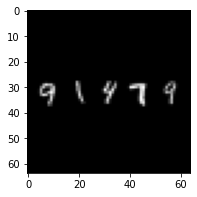

[9, 1, 4, 7, 9]


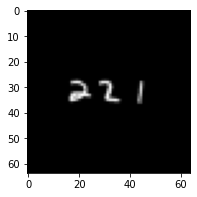

[2, 2, 1, 10, 10]


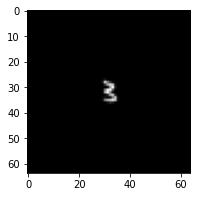

[3, 10, 10, 10, 10]


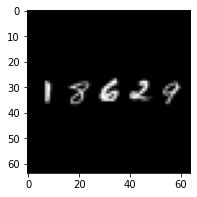

[1, 8, 6, 2, 9]


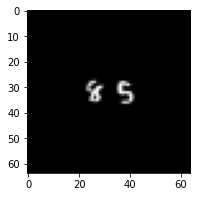

[8, 5, 10, 10, 10]


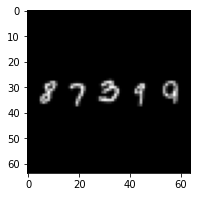

[8, 7, 3, 9, 9]


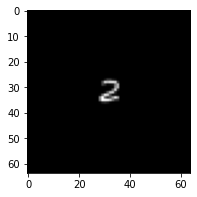

[2, 10, 10, 10, 10]


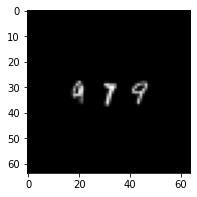

[9, 7, 9, 10, 10]


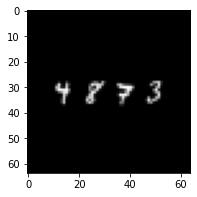

[4, 8, 7, 3, 10]


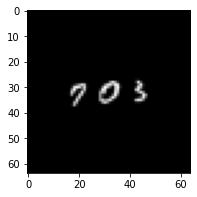

[7, 0, 3, 10, 10]


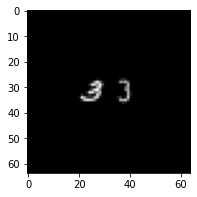

[3, 3, 10, 10, 10]


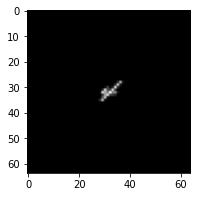

[4, 10, 10, 10, 10]


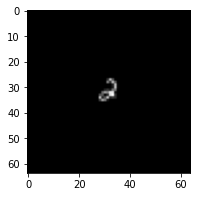

[2, 10, 10, 10, 10]


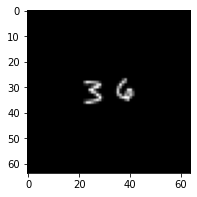

[3, 6, 10, 10, 10]


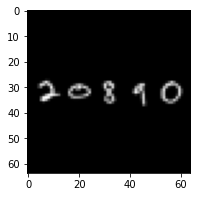

[2, 0, 8, 9, 0]


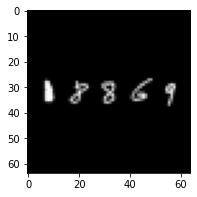

[1, 8, 8, 6, 9]


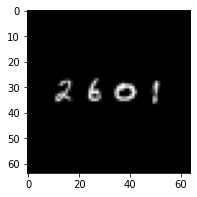

[2, 6, 0, 1, 10]


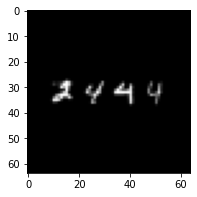

[2, 4, 4, 4, 10]


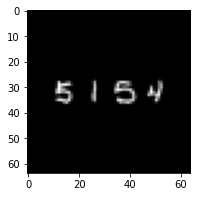

[5, 1, 5, 4, 10]


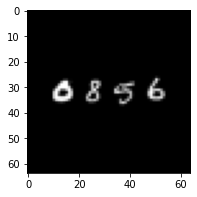

[0, 8, 5, 6, 10]


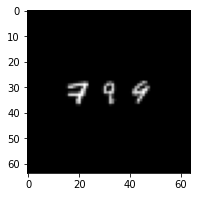

[7, 9, 9, 10, 10]


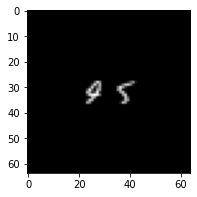

[9, 5, 10, 10, 10]


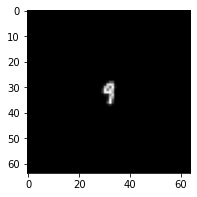

[9, 10, 10, 10, 10]


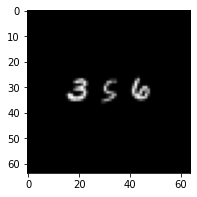

[3, 5, 6, 10, 10]


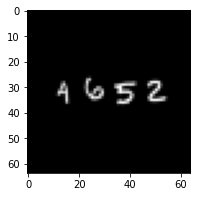

[9, 6, 5, 2, 10]


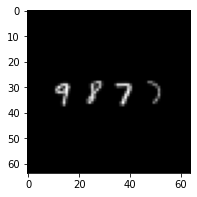

[9, 8, 7, 7, 10]


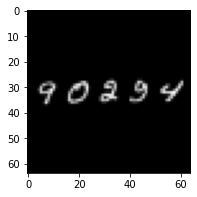

[9, 0, 2, 9, 4]


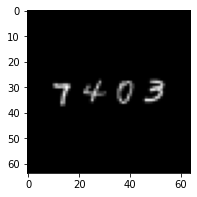

[7, 4, 0, 3, 10]


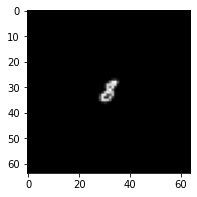

[8, 10, 10, 10, 10]


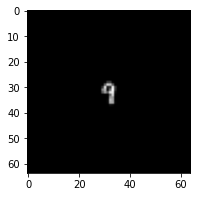

[9, 10, 10, 10, 10]


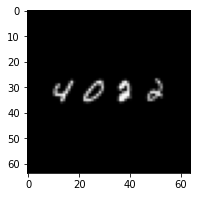

[4, 0, 2, 2, 10]


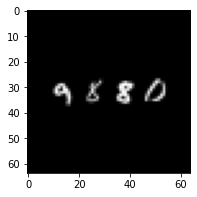

[9, 8, 8, 0, 10]


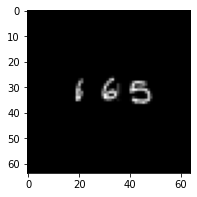

[6, 6, 5, 10, 10]


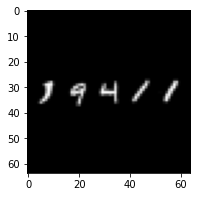

[9, 9, 4, 1, 1]


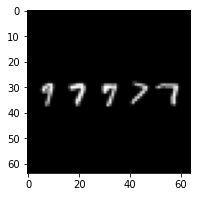

[9, 7, 9, 7, 7]


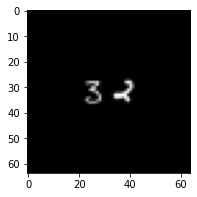

[3, 2, 10, 10, 10]


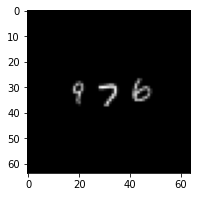

[9, 7, 6, 10, 10]


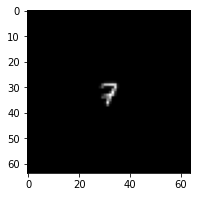

[7, 10, 10, 10, 10]


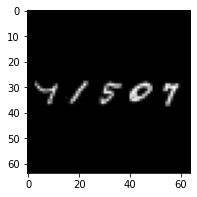

[7, 1, 5, 0, 7]


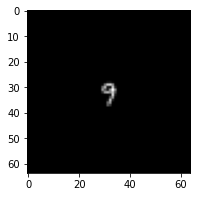

[9, 10, 10, 10, 10]


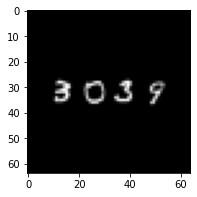

[3, 0, 3, 9, 10]


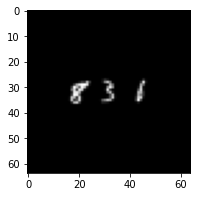

[8, 3, 1, 10, 10]


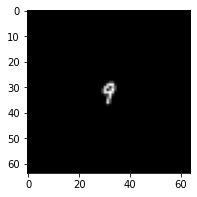

[9, 10, 10, 10, 10]


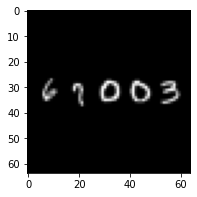

[6, 9, 0, 0, 3]


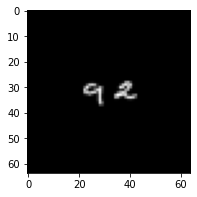

[9, 2, 10, 10, 10]


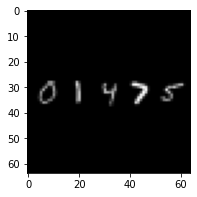

[0, 1, 4, 7, 5]


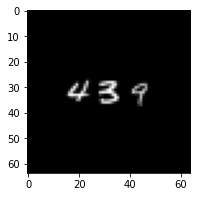

[4, 3, 9, 10, 10]


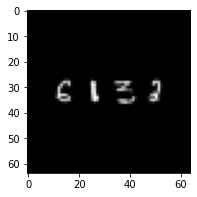

[6, 1, 3, 2, 10]


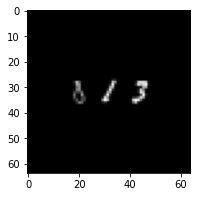

[8, 1, 3, 10, 10]


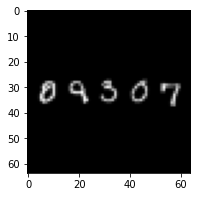

[0, 9, 3, 0, 7]


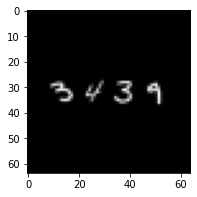

[3, 4, 3, 9, 10]


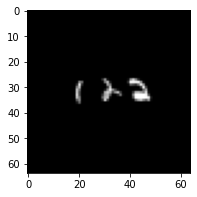

[1, 2, 2, 10, 10]


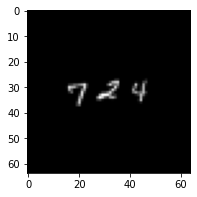

[7, 2, 4, 10, 10]


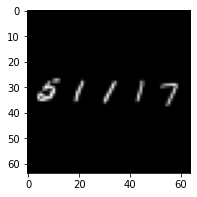

[5, 1, 1, 1, 7]


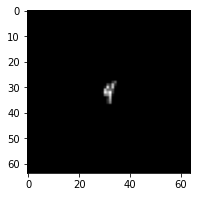

[9, 10, 10, 10, 10]


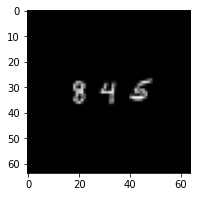

[8, 4, 5, 10, 10]


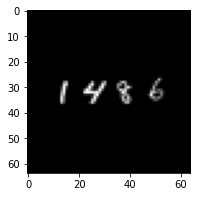

[1, 4, 8, 6, 10]


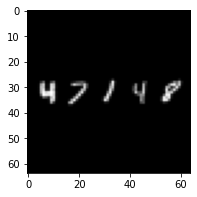

[4, 7, 1, 4, 8]


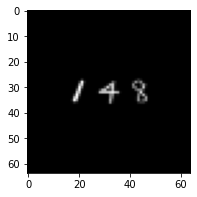

[1, 4, 8, 10, 10]


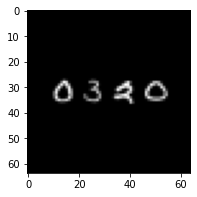

[0, 3, 2, 0, 10]


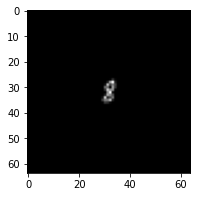

[8, 10, 10, 10, 10]


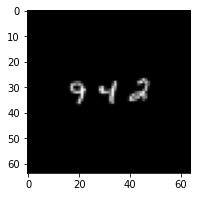

[9, 4, 2, 10, 10]


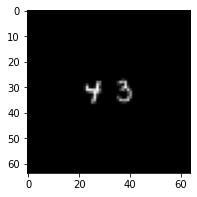

[4, 3, 10, 10, 10]


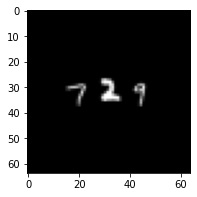

[7, 2, 9, 10, 10]


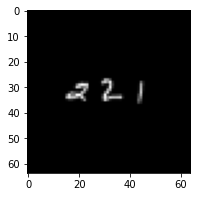

[2, 2, 1, 10, 10]


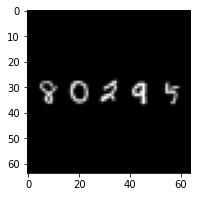

[8, 0, 2, 9, 5]


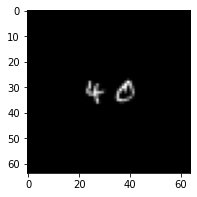

[4, 0, 10, 10, 10]


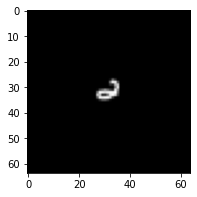

[2, 10, 10, 10, 10]


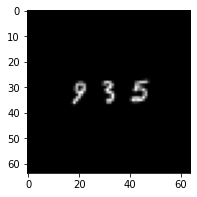

[9, 3, 5, 10, 10]


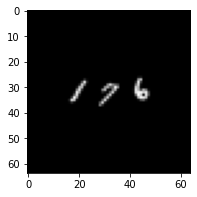

[1, 7, 6, 10, 10]


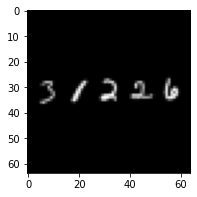

[3, 1, 2, 2, 6]


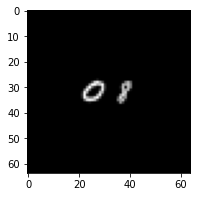

[0, 8, 10, 10, 10]


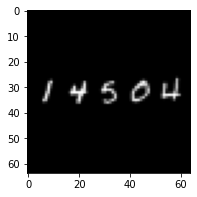

[1, 4, 5, 0, 4]


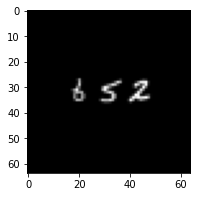

[6, 5, 2, 10, 10]


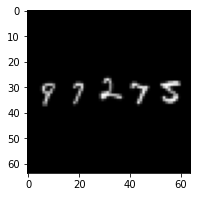

[9, 7, 2, 7, 5]


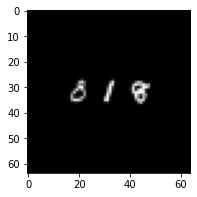

[3, 1, 8, 10, 10]


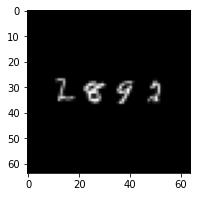

[2, 8, 9, 2, 10]


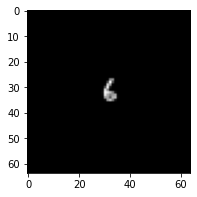

[6, 10, 10, 10, 10]


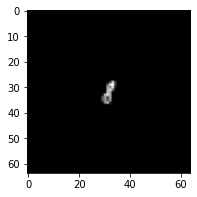

[8, 10, 10, 10, 10]


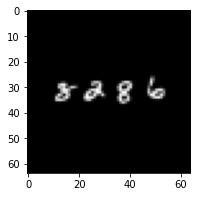

[8, 2, 8, 6, 10]


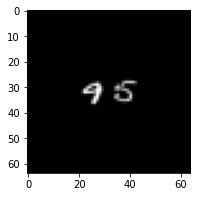

[9, 5, 10, 10, 10]


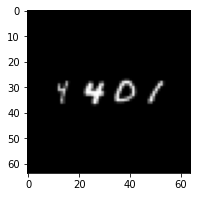

[4, 4, 0, 1, 10]


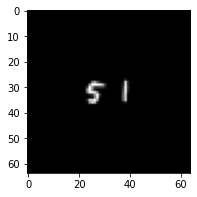

[5, 1, 10, 10, 10]


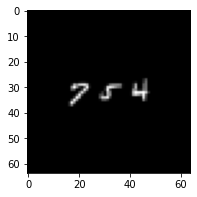

[7, 5, 4, 10, 10]


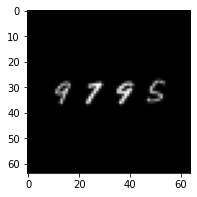

[9, 7, 9, 5, 10]


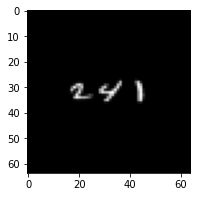

[2, 4, 1, 10, 10]


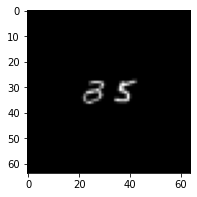

[8, 5, 10, 10, 10]


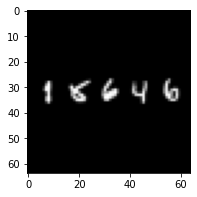

[1, 5, 6, 4, 6]


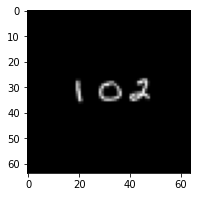

[1, 0, 2, 10, 10]


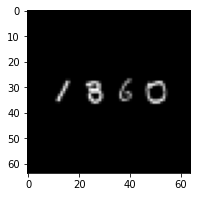

[1, 8, 6, 0, 10]


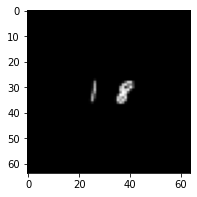

[1, 8, 10, 10, 10]


KeyboardInterrupt: 

In [49]:
for i, sample in enumerate(test_dataset):
    displayGreyWindows(sample, "")
    print(results[i])

In [50]:
#print(str(results[0]))

Id = []
label = []
for i, x in enumerate(results):
    Id.append(i)
    string = ''.join([str(elem) for elem in x])
    label.append(string)
"""
print(Id[0],label[0])
print(df["Label"])
"""
data={"Label":label}

df = pd.DataFrame(data)

df.to_csv('sample.csv', index_label = "Id")
df.head()



Label
0  910101010
1     017810
2      14083
3  010101010
4     467810